In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime
import math
import gc

from sklearn.metrics import roc_auc_score

import lightgbm as lgbm

import pickle
def dump_pkl(data, filename):
  with open(filename, 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_pkl(filename):
  with open(filename, 'rb') as handle:
    data = pickle.load(handle)
  return data

In [4]:
stocks = ['TON-NEAR'
         
         ]
len(stocks)

1

In [8]:
df = load_pkl('./data/feat_engin/lgbm/data_5min_1hour_1day.pkl')

In [10]:
df.shape

(129312, 735)

In [12]:
df.head()

,time,close,ticker,index_1hour,index_1day,close_w1_roc,close_w5_norm_std,close_w5_mean_abs_pct,close_w5_alpha,close_w5_rsi,...,close_1day_w120_ma_low_2std/close,close_1day_w120_ma_up_2std/close,close_1day_w120_ma_low_3std/close,close_1day_w120_ma_up_3std/close,close_1day_w5_min/close_1day_w5_max,close_1day_w10_min/close_1day_w10_max,close_1day_w20_min/close_1day_w20_max,close_1day_w30_min/close_1day_w30_max,close_1day_w60_min/close_1day_w60_max,close_1day_w120_min/close_1day_w120_max
0,2024-01-01 00:00:00,0.616573,TON-NEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-01 00:05:00,0.616427,TON-NEAR,NaN,NaN,-0.000237,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-01 00:10:00,0.613775,TON-NEAR,NaN,NaN,-0.004303,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-01 00:15:00,0.608855,TON-NEAR,NaN,NaN,-0.008015,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-01 00:20:00,0.609961,TON-NEAR,NaN,NaN,0.001816,0.00585,NaN,-404.119354,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
mask_time = df['time'] > pd.Timestamp('2024-10-01') #2024-10-01
df = df[mask_time]
df.reset_index(drop=True, inplace=True)
df

,time,close,ticker,index_1hour,index_1day,close_w1_roc,close_w5_norm_std,close_w5_mean_abs_pct,close_w5_alpha,close_w5_rsi,...,close_1day_w120_ma_low_2std/close,close_1day_w120_ma_up_2std/close,close_1day_w120_ma_low_3std/close,close_1day_w120_ma_up_3std/close,close_1day_w5_min/close_1day_w5_max,close_1day_w10_min/close_1day_w10_max,close_1day_w20_min/close_1day_w20_max,close_1day_w30_min/close_1day_w30_max,close_1day_w60_min/close_1day_w60_max,close_1day_w120_min/close_1day_w120_max
0,2024-10-01 00:05:00,1.084434,TON-NEAR,6575.0,272.0,-0.003207,0.002206,0.002841,104.462746,40.478374,...,0.890940,1.582488,0.718053,1.755375,0.935835,0.819958,0.738755,0.738755,0.591378,0.532703
1,2024-10-01 00:10:00,1.081663,TON-NEAR,6575.0,272.0,-0.002555,0.002370,0.003166,20.305294,36.333263,...,0.893222,1.586542,0.719893,1.759872,0.935835,0.819958,0.738755,0.738755,0.591378,0.532703
2,2024-10-01 00:15:00,1.079444,TON-NEAR,6575.0,272.0,-0.002051,0.002932,0.002715,-373.769867,42.399513,...,0.895058,1.589802,0.721372,1.763488,0.935835,0.819958,0.738755,0.738755,0.591378,0.532703
3,2024-10-01 00:20:00,1.077065,TON-NEAR,6575.0,272.0,-0.002204,0.003919,0.002753,-371.203735,27.227676,...,0.897035,1.593314,0.722966,1.767384,0.935835,0.819958,0.738755,0.738755,0.591378,0.532703
4,2024-10-01 00:25:00,1.078602,TON-NEAR,6575.0,272.0,0.001427,0.002659,0.002289,-492.659241,12.398050,...,0.895757,1.591044,0.721936,1.764866,0.935835,0.819958,0.738755,0.738755,0.591378,0.532703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50394,2025-03-24 23:35:00,1.255537,TON-NEAR,10774.0,447.0,0.000415,0.001530,0.001250,-728.287720,42.613983,...,0.662326,1.024601,0.571758,1.115169,0.967858,0.814490,0.720836,0.715516,0.715516,0.614914
50395,2025-03-24 23:40:00,1.256227,TON-NEAR,10774.0,447.0,0.000549,0.000867,0.000910,-664.997192,21.176495,...,0.661963,1.024038,0.571444,1.114557,0.967858,0.814490,0.720836,0.715516,0.715516,0.614914
50396,2025-03-24 23:45:00,1.255036,TON-NEAR,10774.0,447.0,-0.000948,0.000393,0.000827,246.021439,23.296997,...,0.662591,1.025010,0.571986,1.115614,0.967858,0.814490,0.720836,0.715516,0.715516,0.614914
50397,2025-03-24 23:50:00,1.255464,TON-NEAR,10774.0,447.0,0.000342,0.000392,0.000531,409.433197,49.144466,...,0.662364,1.024660,0.571791,1.115233,0.967858,0.814490,0.720836,0.715516,0.715516,0.614914


In [18]:
df.isnull().any().any()

False

## CHANGE TARGET

In [29]:
def get_target(df_all, ind, val_first, val_second, points_to_wait):
    #цель - достичь val_second, не достигнув val_first

    ind_end = min(ind+points_to_wait+1, df_all.shape[0])
    
    df = df_all.iloc[ind:ind_end].copy()
    
    mask_stock = np.array(df['ticker'] == df['ticker'].iloc[0])
    df = df.loc[mask_stock, :]

    start_price = df['close'].iloc[0]
    
    if val_first < val_second:                                 
        mask_val_first = np.array(df['close'] < val_first)
        mask_val_second = np.array(df['close'] > val_second)
    else: #short game
        mask_val_first = np.array(df['close'] > val_first)
        mask_val_second = np.array(df['close'] < val_second)

    
    if (mask_val_first.sum() == 0) & (mask_val_second.sum() == 0):

        ind_end = df.shape[0]-1
        delta_time = df['time'].iloc[ind_end] - df['time'].iloc[0]
        res_price = df['close'].iloc[ind_end]
        if val_first < val_second:
            income_rate = res_price/start_price
        else: #short game
            income_rate = (2*start_price-res_price)/start_price
        return 'DNF', delta_time, income_rate, res_price, ind_end+ind
        
    if (mask_val_first.sum() == 0) & (mask_val_second.sum() != 0):
        ind_val_second = np.argwhere(mask_val_second).ravel()[0]
        delta_time = df['time'].iloc[ind_val_second] - df['time'].iloc[0]
        res_price = df['close'].iloc[ind_val_second]
        if val_first < val_second:
            income_rate = res_price/start_price
        else: #short game
            income_rate = (2*start_price-res_price)/start_price
        return 'WIN', delta_time, income_rate, res_price, ind_val_second+ind
        
    if (mask_val_first.sum() != 0) & (mask_val_second.sum() == 0):
        ind_val_first = np.argwhere(mask_val_first).ravel()[0]
        delta_time = df['time'].iloc[ind_val_first] - df['time'].iloc[0]
        res_price = df['close'].iloc[ind_val_first]
        if val_first < val_second:
            income_rate = res_price/start_price
        else: #short game
            income_rate = (2*start_price-res_price)/start_price
        return 'LOSE', delta_time, income_rate, res_price, ind_val_first+ind

    if (mask_val_first.sum() != 0) & (mask_val_second.sum() != 0):
        ind_val_first = np.argwhere(mask_val_first).ravel()[0]
        ind_val_second = np.argwhere(mask_val_second).ravel()[0]
        if ind_val_first < ind_val_second:
            delta_time = df['time'].iloc[ind_val_first] - df['time'].iloc[0]
            res_price = df['close'].iloc[ind_val_first]
            if val_first < val_second:
                income_rate = res_price/start_price
            else: #short game
                income_rate = (2*start_price-res_price)/start_price
            return 'LOSE', delta_time, income_rate, res_price, ind_val_first+ind
        if ind_val_first > ind_val_second:
            delta_time = df['time'].iloc[ind_val_second] - df['time'].iloc[0]
            res_price = df['close'].iloc[ind_val_second]
            if val_first < val_second:
                income_rate = res_price/start_price
            else:  #short game
                income_rate = (2*start_price-res_price)/start_price
            return 'WIN', delta_time, income_rate, res_price, ind_val_second+ind


def get_df_target(df, indx, percent_first=None, percent_second=None, points_to_wait=None):
    times = []
    results = []
    delta_times = []
    income_rates = []
    closes = []
    tickers = []
    res_prices = []
    res_inds = []
    
    #for ind in indx:
    for ind in tqdm(indx):
        time = df['time'].iloc[ind]
        close = df['close'].iloc[ind]
        ticker = df['ticker'].iloc[ind]
        
        val_first = df['close'].iloc[ind] * percent_first
        val_second = df['close'].iloc[ind] * percent_second
        result, delta_time, income_rate, res_price, res_ind = get_target(df, ind, val_first, val_second, points_to_wait)
        
        times += [time]
        closes += [close]
        tickers += [ticker]
        results += [result]
        delta_times += [delta_time]
        income_rates += [income_rate]
        res_prices += [res_price]
        res_inds += [res_ind]
        

    df_result = pd.DataFrame({'ind' : indx,
                              'time' : times,
                              'close' : closes,
                              'result' : results,
                              'ticker' : tickers, 
                              'delta_time' : delta_times,
                              'income_rate' : income_rates,
                              'res_price' : res_prices,
                              'res_ind' : res_inds
                             })

    # #макс выигрыш и потери
    # if percent_first < percent_second:  
    #     df_result["income_rate"] = np.maximum(df_result["income_rate"], percent_first) #макс потери
    #     df_result["income_rate"] = np.minimum(df_result["income_rate"], percent_second) #макс выигрыш
    # else:
    #     df_result["income_rate"] = np.maximum(df_result["income_rate"], 2-percent_first) #макс потери
    #     df_result["income_rate"] = np.minimum(df_result["income_rate"], 2-percent_second) #макс выигрыш
    
    # df_result['income_rate'] -= 0.001
    
    return df_result    

In [33]:
inds = np.arange(df.shape[0])
inds.shape

(50399,)

In [335]:
df_result = get_df_target(df[['time', 'close', 'ticker']], inds, percent_first=1.03, percent_second=0.95, points_to_wait=12*24*1)
df_result

100%|█████████████████████████████████████████████████████████████████| 50399/50399 [00:11<00:00, 4556.95it/s]


,ind,time,close,result,ticker,delta_time,income_rate,res_price,res_ind
0,0,2024-10-01 00:05:00,1.084434,LOSE,TON-NEAR,0 days 20:10:00,0.966061,1.121238,242
1,1,2024-10-01 00:10:00,1.081663,LOSE,TON-NEAR,0 days 20:05:00,0.963413,1.121238,242
2,2,2024-10-01 00:15:00,1.079444,LOSE,TON-NEAR,0 days 20:00:00,0.961283,1.121238,242
3,3,2024-10-01 00:20:00,1.077065,LOSE,TON-NEAR,0 days 19:20:00,0.969530,1.109883,235
4,4,2024-10-01 00:25:00,1.078602,LOSE,TON-NEAR,0 days 19:50:00,0.960471,1.121238,242
...,...,...,...,...,...,...,...,...,...
50394,50394,2025-03-24 23:35:00,1.255537,DNF,TON-NEAR,0 days 00:20:00,1.000537,1.254862,50398
50395,50395,2025-03-24 23:40:00,1.256227,DNF,TON-NEAR,0 days 00:15:00,1.001086,1.254862,50398
50396,50396,2025-03-24 23:45:00,1.255036,DNF,TON-NEAR,0 days 00:10:00,1.000139,1.254862,50398
50397,50397,2025-03-24 23:50:00,1.255464,DNF,TON-NEAR,0 days 00:05:00,1.000480,1.254862,50398


In [337]:
df_result.loc[:, 'result'].value_counts(normalize=True)

result
DNF     0.426258
LOSE    0.403897
WIN     0.169845
Name: proportion, dtype: float64

In [339]:
# 1days
# result
# DNF     0.534354
# LOSE    0.375865
# WIN     0.089780
# Name: proportion, dtype: float64

In [341]:
df_result.loc[:, 'income_rate'].quantile(q=[0, 0.01]+np.arange(0.1, 1, 0.1).tolist()+[0.99, 1])

0.00    0.918060
0.01    0.957411
0.10    0.967644
0.20    0.968825
0.30    0.969500
0.40    0.969983
0.50    0.991853
0.60    1.004861
0.70    1.016375
0.80    1.033887
0.90    1.051318
0.99    1.059127
1.00    1.095542
Name: income_rate, dtype: float64

In [343]:
#распределение времени в часах
(df_result.loc[:, 'delta_time']/ pd.Timedelta('24 hour')).quantile(q=[0, 0.01]+np.arange(0.1, 1, 0.1).tolist()+[0.99, 1])

0.00    0.000000
0.01    0.052083
0.10    0.204861
0.20    0.340278
0.30    0.479167
0.40    0.642361
0.50    0.833333
0.60    1.000000
0.70    1.000000
0.80    1.000000
0.90    1.000000
0.99    1.000000
1.00    1.000000
Name: delta_time, dtype: float64

In [346]:
(df['close'].values == df_result['close'].values).all(), (df['time'].values == df_result['time'].values).all()

(True, True)

In [348]:
df_result.head()

,ind,time,close,result,ticker,delta_time,income_rate,res_price,res_ind
0,0,2024-10-01 00:05:00,1.084434,LOSE,TON-NEAR,0 days 20:10:00,0.966061,1.121238,242
1,1,2024-10-01 00:10:00,1.081663,LOSE,TON-NEAR,0 days 20:05:00,0.963413,1.121238,242
2,2,2024-10-01 00:15:00,1.079444,LOSE,TON-NEAR,0 days 20:00:00,0.961283,1.121238,242
3,3,2024-10-01 00:20:00,1.077065,LOSE,TON-NEAR,0 days 19:20:00,0.969530,1.109883,235
4,4,2024-10-01 00:25:00,1.078602,LOSE,TON-NEAR,0 days 19:50:00,0.960471,1.121238,242


In [350]:
df.head()

,time,close,ticker,index_1hour,index_1day,close_w1_roc,close_w5_norm_std,close_w5_mean_abs_pct,close_w5_alpha,close_w5_rsi,...,close_1day_w120_min/close_1day_w120_max,ind,result,delta_time,income_rate,res_price,res_ind,target,ticker_code,y_pred
0,2024-10-01 00:05:00,1.084434,TON-NEAR,6575.0,272.0,-0.003207,0.002206,0.002841,104.462746,40.478374,...,0.532703,0,WIN,0 days 09:55:00,1.03157,1.050199,119,1,0,0.205332
1,2024-10-01 00:10:00,1.081663,TON-NEAR,6575.0,272.0,-0.002555,0.002370,0.003166,20.305294,36.333263,...,0.532703,1,LOSE,0 days 01:20:00,0.989227,1.093316,17,0,0,0.205332
2,2024-10-01 00:15:00,1.079444,TON-NEAR,6575.0,272.0,-0.002051,0.002932,0.002715,-373.769867,42.399513,...,0.532703,2,LOSE,0 days 01:00:00,0.988683,1.09166,14,0,0,0.205332
3,2024-10-01 00:20:00,1.077065,TON-NEAR,6575.0,272.0,-0.002204,0.003919,0.002753,-371.203735,27.227676,...,0.532703,3,LOSE,0 days 00:55:00,0.986449,1.09166,14,0,0,0.205332
4,2024-10-01 00:25:00,1.078602,TON-NEAR,6575.0,272.0,0.001427,0.002659,0.002289,-492.659241,12.398050,...,0.532703,4,LOSE,0 days 00:50:00,0.987893,1.09166,14,0,0,0.205332


In [352]:
df[['ind', 'result', 'delta_time', 'income_rate', 'res_price', 'res_ind']] = df_result[['ind', 'result', 'delta_time', 'income_rate', 'res_price', 'res_ind']].values

In [354]:
df

,time,close,ticker,index_1hour,index_1day,close_w1_roc,close_w5_norm_std,close_w5_mean_abs_pct,close_w5_alpha,close_w5_rsi,...,close_1day_w120_min/close_1day_w120_max,ind,result,delta_time,income_rate,res_price,res_ind,target,ticker_code,y_pred
0,2024-10-01 00:05:00,1.084434,TON-NEAR,6575.0,272.0,-0.003207,0.002206,0.002841,104.462746,40.478374,...,0.532703,0,LOSE,0 days 20:10:00,0.966061,1.121238,242,1,0,0.205332
1,2024-10-01 00:10:00,1.081663,TON-NEAR,6575.0,272.0,-0.002555,0.002370,0.003166,20.305294,36.333263,...,0.532703,1,LOSE,0 days 20:05:00,0.963413,1.121238,242,0,0,0.205332
2,2024-10-01 00:15:00,1.079444,TON-NEAR,6575.0,272.0,-0.002051,0.002932,0.002715,-373.769867,42.399513,...,0.532703,2,LOSE,0 days 20:00:00,0.961283,1.121238,242,0,0,0.205332
3,2024-10-01 00:20:00,1.077065,TON-NEAR,6575.0,272.0,-0.002204,0.003919,0.002753,-371.203735,27.227676,...,0.532703,3,LOSE,0 days 19:20:00,0.96953,1.109883,235,0,0,0.205332
4,2024-10-01 00:25:00,1.078602,TON-NEAR,6575.0,272.0,0.001427,0.002659,0.002289,-492.659241,12.398050,...,0.532703,4,LOSE,0 days 19:50:00,0.960471,1.121238,242,0,0,0.205332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50394,2025-03-24 23:35:00,1.255537,TON-NEAR,10774.0,447.0,0.000415,0.001530,0.001250,-728.287720,42.613983,...,0.614914,50394,DNF,0 days 00:20:00,1.000537,1.254862,50398,0,0,None
50395,2025-03-24 23:40:00,1.256227,TON-NEAR,10774.0,447.0,0.000549,0.000867,0.000910,-664.997192,21.176495,...,0.614914,50395,DNF,0 days 00:15:00,1.001086,1.254862,50398,0,0,None
50396,2025-03-24 23:45:00,1.255036,TON-NEAR,10774.0,447.0,-0.000948,0.000393,0.000827,246.021439,23.296997,...,0.614914,50396,DNF,0 days 00:10:00,1.000139,1.254862,50398,0,0,None
50397,2025-03-24 23:50:00,1.255464,TON-NEAR,10774.0,447.0,0.000342,0.000392,0.000531,409.433197,49.144466,...,0.614914,50397,DNF,0 days 00:05:00,1.00048,1.254862,50398,0,0,None


In [357]:
#проверить данные

#mask = df['time'] >= pd.Timestamp('2025-02-01')


i = 3730
cols = ['ticker', 'time', 'close', 'result', 'delta_time', 'income_rate', 'res_price', 'res_ind']
df.loc[:, cols].iloc[i:i+10]

,ticker,time,close,result,delta_time,income_rate,res_price,res_ind
3730,TON-NEAR,2024-10-13 22:55:00,1.118361,WIN,0 days 18:45:00,1.05102,1.061302,3955
3731,TON-NEAR,2024-10-13 23:00:00,1.116193,WIN,0 days 19:30:00,1.052817,1.057239,3965
3732,TON-NEAR,2024-10-13 23:05:00,1.116501,WIN,0 days 19:25:00,1.053078,1.057239,3965
3733,TON-NEAR,2024-10-13 23:10:00,1.116920,WIN,0 days 19:20:00,1.053433,1.057239,3965
3734,TON-NEAR,2024-10-13 23:15:00,1.115660,WIN,0 days 19:15:00,1.052364,1.057239,3965
3735,TON-NEAR,2024-10-13 23:20:00,1.117024,WIN,0 days 19:05:00,1.050081,1.061082,3964
3736,TON-NEAR,2024-10-13 23:25:00,1.118512,WIN,0 days 18:15:00,1.051148,1.061302,3955
3737,TON-NEAR,2024-10-13 23:30:00,1.115601,WIN,0 days 19:00:00,1.052314,1.057239,3965
3738,TON-NEAR,2024-10-13 23:35:00,1.116591,WIN,0 days 18:55:00,1.053155,1.057239,3965
3739,TON-NEAR,2024-10-13 23:40:00,1.118769,WIN,0 days 18:00:00,1.051366,1.061302,3955


In [359]:
#можно бы на всяк случай и проверить

### 1. train/valid/test/test2 split

In [364]:
df['target'] = (df['result'] == 'WIN').astype(int)

<Axes: xlabel='time'>

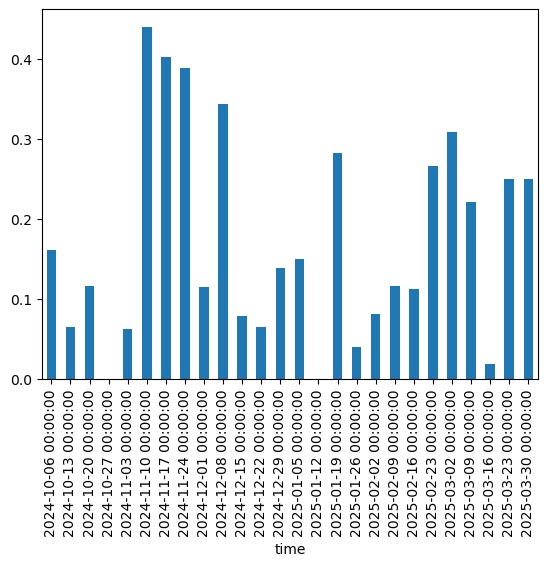

In [368]:
df.loc[:, ['time', 'target']].groupby(pd.Grouper(key='time', freq='W')).target.mean().plot.bar()

<Axes: xlabel='time'>

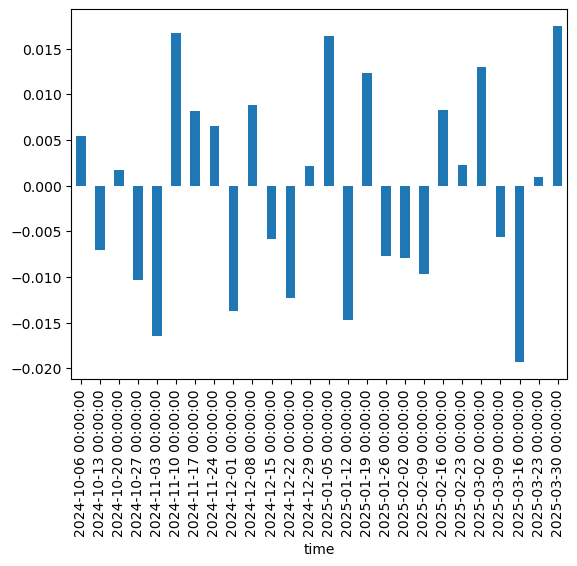

In [370]:
(df.loc[:, ['time', 'income_rate']].groupby(pd.Grouper(key='time', freq='W')).income_rate.mean()-1).plot.bar()

In [373]:
pd.set_option('display.max_rows', 150)
df.loc[:, ['ticker', 'target']].groupby('ticker').target.mean().sort_values()

ticker
TON-NEAR    0.169845
Name: target, dtype: float64

In [375]:
df.loc[:, ['ticker', 'income_rate']].groupby('ticker').income_rate.mean().sort_values()

ticker
TON-NEAR    0.998954
Name: income_rate, dtype: object

In [379]:
df['time'].min(), df['time'].max()

(Timestamp('2024-10-01 00:05:00'), Timestamp('2025-03-24 23:55:00'))

In [381]:
mask_train = np.array(df['time'] < pd.Timestamp('2025-01-01'))
mask_valid = np.array((pd.Timestamp('2025-01-01') <= df['time']) & (df['time'] < pd.Timestamp('2025-02-01')))
mask_test = np.array((pd.Timestamp('2025-02-01') <= df['time']) & (df['time'] < pd.Timestamp('2025-02-24')))
mask_test2 = np.array((pd.Timestamp('2025-02-24') <= df['time']) & (df['time'] < pd.Timestamp('2025-03-23')))
#mask_test3 = np.array(pd.Timestamp('2025-01-01') <= df['time'])

In [384]:
# mask_train = mask_train|mask_valid
# mask_valid = mask_test
# mask_test = mask_test2
# mask_test2 = mask_test

In [387]:
mask_train.sum(), mask_valid.sum(), mask_test.sum(), mask_test2.sum()

(26495, 8928, 6624, 7776)

In [389]:
#mask_test3.sum()

In [392]:
mask_data = mask_train|mask_valid|mask_test|mask_test2
(mask_data).sum()

49823

In [395]:
mask_train.sum()/(mask_data).sum(), mask_valid.sum()/(mask_data).sum(), mask_test.sum()/(mask_data).sum(), mask_test2.sum()/(mask_data).sum()

(0.5317825100857034,
 0.1791943479918913,
 0.13295064528430645,
 0.15607249663809886)

In [398]:
df.loc[mask_train, 'target'].mean(), df.loc[mask_valid, 'target'].mean(), df.loc[mask_test, 'target'].mean(), df.loc[mask_test2, 'target'].mean()

(0.17992073976221928,
 0.11895161290322581,
 0.15745772946859904,
 0.18737139917695472)

In [400]:
#df.loc[mask_test3, 'target'].mean()

In [403]:
df.loc[mask_train, 'income_rate'].mean(), df.loc[mask_valid, 'income_rate'].mean(), df.loc[mask_test, 'income_rate'].mean(), df.loc[mask_test2, 'income_rate'].mean()

(0.9986208357589991,
 1.0014950949373902,
 0.9981474267449089,
 0.9957644723891788)

In [405]:
#df.loc[mask_test3, 'income_rate'].mean()

In [409]:
#проверки

In [411]:
(mask_train.sum()+mask_valid.sum()+mask_test.sum()+mask_test2.sum()) ==(mask_data).sum()

#(mask_train.sum()+mask_valid.sum()+mask_test.sum()) ==(mask_data).sum()

True

## 3. Model

### 3.1 Base model

In [416]:
df['ticker_code'] = df['ticker'].astype('category').cat.codes

In [418]:
df['ticker_code'].nunique()

1

In [420]:
df.loc[mask_train, 'ticker_code'].nunique()

1

In [423]:
drop_cols = [
 'time',
 'close',


 'ticker',

 'index_1hour',
 'index_1day',
    
 'ind',
 'result',
 'delta_time',
 'income_rate',
 'res_price',
 'res_ind',

'time_1hour',
 'close_1hour',


'time_1day',
 'close_1day',

    
             'target',
             'y_pred']


features_all = df.columns[~df.columns.isin(drop_cols)].tolist()

cat_features_all = ['ticker_code',
                'hour', 'day', 'weekday',
]
cat_features = cat_features_all

target = 'target'

In [426]:
# def get_useful_features(feature):
#     # if ('1day' not in feature) and ('1hour' not in feature):
#     #     return False
#     # if 'roc' in feature:
#     #     return False
    
#     for elem in ['expma']: #, 'alpha'
#         if elem in feature:
#             return True
#     return False

# mask_useful_features = np.array([get_useful_features(feature) for feature in features_all])
# features_useful = np.array(features_all)[mask_useful_features].tolist()
# len(features_useful), features_useful

In [428]:
# features_all = features_useful
# cat_features_all = []
# cat_features = []

In [430]:
len(features_all), len(cat_features)

(727, 4)

In [432]:
features_all

['close_w1_roc',
 'close_w5_norm_std',
 'close_w5_mean_abs_pct',
 'close_w5_alpha',
 'close_w5_rsi',
 'close_w5_roc',
 'close_w10_norm_std',
 'close_w10_mean_abs_pct',
 'close_w10_alpha',
 'close_w10_rsi',
 'close_w10_roc',
 'close_w20_norm_std',
 'close_w20_mean_abs_pct',
 'close_w20_alpha',
 'close_w20_rsi',
 'close_w20_roc',
 'close_w30_norm_std',
 'close_w30_mean_abs_pct',
 'close_w30_alpha',
 'close_w30_rsi',
 'close_w30_roc',
 'close_w30_lvl_1-1.02',
 'close_w30_lvl_-0.98-1',
 'close_w30_lvl_1.02-1.04',
 'close_w30_lvl_-0.96-0.98',
 'close_w30_lvl_1.04-1.06',
 'close_w30_lvl_-0.94-0.96',
 'close_w30_lvl_1.06-1.08',
 'close_w30_lvl_-0.92-0.94',
 'close_w30_lvl_1.08-1.1',
 'close_w30_lvl_-0.9-0.92',
 'close_w30_lvl_1.1-1.12',
 'close_w30_lvl_-0.88-0.9',
 'close_w60_norm_std',
 'close_w60_mean_abs_pct',
 'close_w60_alpha',
 'close_w60_rsi',
 'close_w60_roc',
 'close_w120_norm_std',
 'close_w120_mean_abs_pct',
 'close_w120_alpha',
 'close_w120_rsi',
 'close_w120_roc',
 'close_w120_lv

### 1. PSI

In [435]:
def psi(expected: np.ndarray, actual: np.ndarray, bucket_type: str = "bins", n_bins: int = 10) -> float:
    """Calculate PSI metric for two arrays.
    
    Parameters
    ----------
        expected : list-like
            Array of expected values
        actual : list-like
            Array of actual values
        bucket_type : str
            Binning strategy. Accepts two options: 'bins' and 'quantiles'. Defaults to 'bins'.
            'bins': input arrays are splitted into bins with equal
                and fixed steps based on 'expected' array
            'quantiles': input arrays are binned according to 'expected' array
                with given number of n_bins
        n_bins : int
            Number of buckets for binning. Defaults to 10.

    Returns
    -------
        A single float number
    """
    breakpoints = np.arange(0, n_bins + 1) / (n_bins) * 100
    if bucket_type == "bins":
        breakpoints = np.histogram(expected, n_bins)[1]
    elif bucket_type == "quantiles":
        breakpoints = np.percentile(expected, breakpoints)

    # Calculate frequencies
    expected_percents = np.histogram(expected, breakpoints)[0] / len(expected)
    actual_percents = np.histogram(actual, breakpoints)[0] / len(actual)
    # Clip freaquencies to avoid zero division
    expected_percents = np.clip(expected_percents, a_min=0.0001, a_max=None)
    actual_percents = np.clip(actual_percents, a_min=0.0001, a_max=None)
    # Calculate PSI
    psi_value = (expected_percents - actual_percents) * np.log(expected_percents / actual_percents)
    psi_value = sum(psi_value)

    return psi_value

In [932]:
psi_features = {'feature' : [],
                
               'psi_valid' : [],
               'psi_test' : [],
               'psi_test2' : [],

               'psi_neg_valid' : [],
               'psi_neg_test' : [],
               'psi_neg_test2' : [],

               'psi_pos_valid' : [],
               'psi_pos_test' : [],
               'psi_pos_test2' : [],
               }

for feature in tqdm(features_all):

    mask_pos = df['target'] == 1
    mask_neg = ~mask_pos

    psi_features['feature'] += [feature]
    
    psi_features['psi_valid'] += [psi(df.loc[mask_train, feature].values, df.loc[mask_valid, feature].values)]
    psi_features['psi_test'] += [psi(df.loc[mask_train, feature].values, df.loc[mask_test, feature].values)]
    psi_features['psi_test2'] += [psi(df.loc[mask_train, feature].values, df.loc[mask_test2, feature].values)]

    psi_features['psi_neg_valid'] += [psi(df.loc[mask_train&mask_neg, feature].values, df.loc[mask_valid&mask_neg, feature].values)]
    psi_features['psi_neg_test'] += [psi(df.loc[mask_train&mask_neg, feature].values, df.loc[mask_test&mask_neg, feature].values)]
    psi_features['psi_neg_test2'] += [psi(df.loc[mask_train&mask_neg, feature].values, df.loc[mask_test2&mask_neg, feature].values)]

    psi_features['psi_pos_valid'] += [psi(df.loc[mask_train&mask_pos, feature].values, df.loc[mask_valid&mask_pos, feature].values)]
    psi_features['psi_pos_test'] += [psi(df.loc[mask_train&mask_pos, feature].values, df.loc[mask_test&mask_pos, feature].values)]
    psi_features['psi_pos_test2'] += [psi(df.loc[mask_train&mask_pos, feature].values, df.loc[mask_test2&mask_pos, feature].values)]

df_psi = pd.DataFrame(psi_features)

100%|██████████████████████████████████████████████████████████████████████| 727/727 [00:05<00:00, 142.09it/s]


In [137]:
pd.set_option('display.max_rows', 800)
df_psi

,feature,psi_valid,psi_test,psi_test2,psi_neg_valid,psi_neg_test,psi_neg_test2,psi_pos_valid,psi_pos_test,psi_pos_test2
0,close/close_w5_expma,0.017439,0.003351,0.003351,0.031922,0.004419,0.004419,0.087772,0.020562,0.020562
1,close/close_w10_expma,0.032044,0.005382,0.005382,0.036175,0.006928,0.006928,0.170505,0.032493,0.032493
2,close/close_w20_expma,0.030480,0.011259,0.011259,0.028976,0.023944,0.023944,0.140980,0.050780,0.050780
3,close/close_w30_expma,0.030988,0.021973,0.021973,0.028282,0.029689,0.029689,0.317526,0.136107,0.136107
4,close/close_w60_expma,0.027018,0.033385,0.033385,0.033163,0.054376,0.054376,0.371386,0.221123,0.221123
5,close/close_w120_expma,0.057954,0.047548,0.047548,0.056766,0.033185,0.033185,0.332102,0.454743,0.454743
6,close_w5_expma/close_w10_expma,0.037391,0.009465,0.009465,0.033068,0.009394,0.009394,0.177495,0.036166,0.036166
7,close_w5_expma/close_w20_expma,0.034083,0.028279,0.028279,0.029603,0.023640,0.023640,0.282378,0.108273,0.108273
8,close_w5_expma/close_w30_expma,0.032431,0.035936,0.035936,0.027075,0.026072,0.026072,0.362954,0.148952,0.148952
9,close_w5_expma/close_w60_expma,0.032458,0.035645,0.035645,0.028312,0.060174,0.060174,0.371550,0.177512,0.177512


In [239]:
psi_threshold = 0.2
mask_psi_pos_neg = (df_psi['psi_valid'] < psi_threshold) #& (df_psi['psi_test'] < psi_threshold) & (df_psi['psi_test2'] < psi_threshold)
mask_psi_neg = (df_psi['psi_neg_valid'] < psi_threshold) #& (df_psi['psi_neg_test'] < psi_threshold) & (df_psi['psi_neg_test2'] < psi_threshold)
mask_psi_pos = (df_psi['psi_pos_valid'] < psi_threshold) #& (df_psi['psi_pos_test'] < psi_threshold) & (df_psi['psi_pos_test2'] < psi_threshold)


In [242]:
len(features_all)

63

In [244]:
mask_psi_pos_neg.sum(), (mask_psi_pos_neg & mask_psi_neg & mask_psi_pos).sum()

(30, 5)

In [246]:
mask_psi = mask_psi_pos_neg# & mask_psi_neg & mask_psi_pos

In [248]:
np.array(features_all)[mask_psi]

array(['close/close_w5_expma', 'close/close_w10_expma',
       'close/close_w20_expma', 'close/close_w30_expma',
       'close/close_w60_expma', 'close/close_w120_expma',
       'close_w5_expma/close_w10_expma', 'close_w5_expma/close_w20_expma',
       'close_w5_expma/close_w30_expma', 'close_w5_expma/close_w60_expma',
       'close_w5_expma/close_w120_expma',
       'close_w10_expma/close_w20_expma',
       'close_w10_expma/close_w30_expma',
       'close_w10_expma/close_w60_expma',
       'close_w10_expma/close_w120_expma',
       'close_w20_expma/close_w30_expma',
       'close_w20_expma/close_w60_expma',
       'close_w20_expma/close_w120_expma',
       'close_w30_expma/close_w60_expma',
       'close_w30_expma/close_w120_expma',
       'close_w60_expma/close_w120_expma', 'close/close_1hour_w5_expma',
       'close/close_1hour_w10_expma', 'close/close_1hour_w20_expma',
       'close/close_1hour_w30_expma',
       'close_1hour_w5_expma/close_1hour_w10_expma',
       'close_1hour_w5_

In [250]:
features_psi = np.array(features_all)[mask_psi]
len(features_psi)

30

### 2. Correlation

In [255]:
mask_train.sum(), mask_valid.sum(), mask_test.sum(), mask_test2.sum()

(26495, 8928, 6624, 6624)

In [941]:
#subsample_train

coeff_subsample = 1

inds_train = np.argwhere(mask_train).ravel()
inds_train_subsample = np.random.RandomState(seed=42).permutation(inds_train)[:int(len(inds_train)*coeff_subsample)]

mask_train_subsample = np.zeros_like(mask_train).astype(bool)
mask_train_subsample[inds_train_subsample] = True

mask_train_subsample.sum()

26495

In [260]:
features = features_psi.copy()
len(features)

30

In [262]:
mask_corr = np.ones_like(features).astype(bool)
#mask_corr

In [264]:
corr_threshold = 0.99

for i in tqdm(range(len(features) - 1)):
    if mask_corr[i]:
        for j in range(i+1, len(features)):
            if mask_corr[j]:        
                corr = abs(np.corrcoef(df.loc[mask_train_subsample, features[i]], df.loc[mask_train_subsample, features[j]])[0,1])
                if corr > corr_threshold:
                    mask_corr[j] = False
mask_corr.sum()

100%|████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 217.00it/s]


29

In [266]:
np.array(features)[~mask_corr]

array(['close/close_1hour_w10_expma'], dtype='<U44')

In [269]:
features_corr = np.array(features)[mask_corr]
len(features_corr)

29

In [271]:
features_corr

array(['close/close_w5_expma', 'close/close_w10_expma',
       'close/close_w20_expma', 'close/close_w30_expma',
       'close/close_w60_expma', 'close/close_w120_expma',
       'close_w5_expma/close_w10_expma', 'close_w5_expma/close_w20_expma',
       'close_w5_expma/close_w30_expma', 'close_w5_expma/close_w60_expma',
       'close_w5_expma/close_w120_expma',
       'close_w10_expma/close_w20_expma',
       'close_w10_expma/close_w30_expma',
       'close_w10_expma/close_w60_expma',
       'close_w10_expma/close_w120_expma',
       'close_w20_expma/close_w30_expma',
       'close_w20_expma/close_w60_expma',
       'close_w20_expma/close_w120_expma',
       'close_w30_expma/close_w60_expma',
       'close_w30_expma/close_w120_expma',
       'close_w60_expma/close_w120_expma', 'close/close_1hour_w5_expma',
       'close/close_1hour_w20_expma', 'close/close_1hour_w30_expma',
       'close_1hour_w5_expma/close_1hour_w10_expma',
       'close_1hour_w5_expma/close_1hour_w20_expma',
       '

#### 2. Useful features

In [177]:
# def get_useful_features(feature):
#     for elem in ['volume', 'std', 'pct', 'rsi/', 'roc', 'ticker_code']:
#         if elem in feature:
#             return False
#     return True

# mask_useful_features = np.array([get_useful_features(feature) for feature in features_psi])
# features_useful = np.array(features_psi)[mask_useful_features].tolist()
# len(features_useful), features_useful


### 3. Get stability features

In [267]:
#features = features_corr.copy()
features = features_useful
len(features)

63

In [437]:
def mean_win_rate_point(D_sample, y_pred, threshold=None):
    mask = y_pred >= threshold
    score = np.mean(D_sample.label[mask])
    
    return score




def mean_income_rate_point(D_sample, y_pred, threshold=None):
    # q=threshold
    # mask = y_pred >= np.quantile(y_pred, q)
    mask = y_pred >= threshold
    score = np.mean(D_sample.income_rate[mask]) - 1
    
    return score

def mean_income_rate_tick(D_sample, y_pred, threshold=None):
    # q=threshold
    # mask = y_pred >= np.quantile(y_pred, q)
    mask = y_pred >= threshold
    df_sup = pd.DataFrame({'time' : D_sample.time,
                           'income_rate' : D_sample.income_rate,
                           'y_pred' : y_pred})
    score = (df_sup[mask].groupby('time').income_rate.mean()-1).mean()
    
    return score



def mean_income_rate_day(D_sample, y_pred, threshold=None):
    # q=threshold
    # mask = y_pred >= np.quantile(y_pred, q)
    mask = y_pred >= threshold
    df_sup = pd.DataFrame({'time' : D_sample.time,
                           'income_rate' : D_sample.income_rate,
                           'y_pred' : y_pred})
    score = (df_sup[mask].groupby('time').income_rate.mean()-1).reset_index().groupby(pd.Grouper(key='time', freq='D')).income_rate.mean().mean()

    return score
    
def mean_income_rate_month(D_sample, y_pred, threshold=None):
    # q=threshold
    # mask = y_pred >= np.quantile(y_pred, q)
    mask = y_pred >= threshold
    df_sup = pd.DataFrame({'time' : D_sample.time,
                           'income_rate' : D_sample.income_rate,
                           'y_pred' : y_pred})
    score = (df_sup[mask].groupby('time').income_rate.mean()-1).reset_index().groupby(pd.Grouper(key='time', freq='D')).income_rate.mean().mean() * df_sup.loc[mask, 'time'].dt.date.nunique() 
    score = score * (22 / df_sup['time'].dt.date.nunique()) #22 day in month
    
    return score


def mean_income_rate(y_pred, D_sample):
    q = 0.9
    mask = y_pred >= np.quantile(y_pred, q)
    #mask = y_pred >= threshold
    df_sup = pd.DataFrame({'time' : D_sample.time,
                           'income_rate' : D_sample.income_rate,
                           'y_pred' : y_pred})
    # month
    score = (df_sup[mask].groupby('time').income_rate.mean()-1).reset_index().groupby(pd.Grouper(key='time', freq='D')).income_rate.mean().mean() * df_sup.loc[mask, 'time'].dt.date.nunique() 
    score = score * (22 / df_sup['time'].dt.date.nunique()) #22 day in month

    # tick
    #score = (df_sup[mask].groupby('time').income_rate.mean()-1).mean()
    
    # point
    # score = np.mean(D_sample.income_rate[mask]) - 1

    #point win_rate
    # score = np.mean(D_sample.label[mask])

    score = round(score, 5)
    return 'mean_income_rate', score, True#is_higher_better





In [ ]:
params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    
    "num_leaves": 2,

     "bagging_fraction": 0.5,
     "bagging_freq": 1,
     "verbose": -1,
    "metric": "auc",
    #metric": "mean_income_rate",   
    "early_stopping" : 5, 
    
    
}

auc_features = {'feature' : [],
                
               'auc_train' : [],
               'auc_valid' : [],
               'auc_test' : [],
               'auc_test2' : [],
           
           'mir_point@1_train' : [],
           'mir_point@1_valid' : [],
           'mir_point@1_test' : [],
           'mir_point@1_test2' : [],

           'mir_tick@1_train' : [],
           'mir_tick@1_valid' : [],
           'mir_tick@1_test' : [],
           'mir_tick@1_test2' : [],


           'mir_day@1_train' : [],
           'mir_day@1_valid' : [],
           'mir_day@1_test' : [],
           'mir_day@1_test2' : [],

           'mir_month@1_train' : [],
           'mir_month@1_valid' : [],
           'mir_month@1_test' : [],
           'mir_month@1_test2' : [],

           'mean_win_rate_point@1_train' : [],
           'mean_win_rate_point@1_valid' : [],
           'mean_win_rate_point@1_test' : [],
           'mean_win_rate_point@1_test2' : [],

        
               }

for feature in tqdm(features):
    stab_features = [feature]
    stab_cat_features = [feature] if feature in cat_features else []
    
    D_train = lgbm.Dataset(df.loc[mask_train_subsample, stab_features], label=df.loc[mask_train_subsample, target], feature_name=stab_features, categorical_feature=stab_cat_features, free_raw_data=False)
    D_valid = lgbm.Dataset(df.loc[mask_valid, stab_features], label=df.loc[mask_valid, target], feature_name=stab_features, categorical_feature=stab_cat_features, free_raw_data=False)
    D_test = lgbm.Dataset(df.loc[mask_test, stab_features], label=df.loc[mask_test, target], feature_name=stab_features, categorical_feature=stab_cat_features, free_raw_data=False)
    D_test2 = lgbm.Dataset(df.loc[mask_test2, stab_features], label=df.loc[mask_test2, target], feature_name=stab_features, categorical_feature=stab_cat_features, free_raw_data=False)

    D_train.income_rate = df.loc[mask_train_subsample, 'income_rate'].values
    D_valid.income_rate = df.loc[mask_valid, 'income_rate'].values
    D_test.income_rate = df.loc[mask_test, 'income_rate'].values
    D_test2.income_rate = df.loc[mask_test2, 'income_rate'].values
    
    D_train.time = df.loc[mask_train_subsample, 'time'].values
    D_valid.time = df.loc[mask_valid, 'time'].values
    D_test.time = df.loc[mask_test, 'time'].values
    D_test2.time = df.loc[mask_test2, 'time'].values


    
    model = lgbm.train(params, num_boost_round=1000, train_set=D_train, valid_sets=[D_valid])#, feval=mean_income_rate)
    
    y_pred_train = model.predict(D_train.data)
    y_pred_valid = model.predict(D_valid.data)
    y_pred_test = model.predict(D_test.data)
    y_pred_test2 = model.predict(D_test2.data)

    auc_features['feature'] += [feature]
    auc_features['auc_train'] += [roc_auc_score(D_train.label, y_pred_train)]
    auc_features['auc_valid'] += [roc_auc_score(D_valid.label, y_pred_valid)]
    auc_features['auc_test'] += [roc_auc_score(D_test.label, y_pred_test)]
    auc_features['auc_test2'] += [roc_auc_score(D_test2.label, y_pred_test2)]

    
    threshold = np.quantile(y_pred_valid, q=0.95) #в feval тоже нужно менять
    
    auc_features['mir_point@1_train'] += [mean_income_rate_point(D_train, y_pred_train, threshold=threshold)]
    auc_features['mir_point@1_valid'] += [mean_income_rate_point(D_valid, y_pred_valid, threshold=threshold)]
    auc_features['mir_point@1_test'] += [mean_income_rate_point(D_test, y_pred_test, threshold=threshold)]
    auc_features['mir_point@1_test2'] += [mean_income_rate_point(D_test2, y_pred_test2, threshold=threshold)]

    auc_features['mir_tick@1_train'] += [mean_income_rate_tick(D_train, y_pred_train, threshold=threshold)]
    auc_features['mir_tick@1_valid'] += [mean_income_rate_tick(D_valid, y_pred_valid, threshold=threshold)]
    auc_features['mir_tick@1_test'] += [mean_income_rate_tick(D_test, y_pred_test, threshold=threshold)]
    auc_features['mir_tick@1_test2'] += [mean_income_rate_tick(D_test2, y_pred_test2, threshold=threshold)]

    auc_features['mir_day@1_train'] += [mean_income_rate_day(D_train, y_pred_train, threshold=threshold)]
    auc_features['mir_day@1_valid'] += [mean_income_rate_day(D_valid, y_pred_valid, threshold=threshold)]
    auc_features['mir_day@1_test'] += [mean_income_rate_day(D_test, y_pred_test, threshold=threshold)]
    auc_features['mir_day@1_test2'] += [mean_income_rate_day(D_test2, y_pred_test2, threshold=threshold)]

    
    auc_features['mir_month@1_train'] += [mean_income_rate_month(D_train, y_pred_train, threshold=threshold)]
    auc_features['mir_month@1_valid'] += [mean_income_rate_month(D_valid, y_pred_valid, threshold=threshold)]
    auc_features['mir_month@1_test'] += [mean_income_rate_month(D_test, y_pred_test, threshold=threshold)]
    auc_features['mir_month@1_test2'] += [mean_income_rate_month(D_test2, y_pred_test2, threshold=threshold)]

    auc_features['mean_win_rate_point@1_train'] += [mean_win_rate_point(D_train, y_pred_train, threshold=threshold)]
    auc_features['mean_win_rate_point@1_valid'] += [mean_win_rate_point(D_valid, y_pred_valid, threshold=threshold)]
    auc_features['mean_win_rate_point@1_test'] += [mean_win_rate_point(D_test, y_pred_test, threshold=threshold)]
    auc_features['mean_win_rate_point@1_test2'] += [mean_win_rate_point(D_test2, y_pred_test2, threshold=threshold)]

df_auc = pd.DataFrame(auc_features)

In [1722]:
pd.set_option('display.max_columns', 100)
df_auc = pd.DataFrame(auc_features)
df_auc

,feature,auc_train,auc_valid,auc_test,auc_test2,mir_point@1_train,mir_point@1_valid,mir_point@1_test,mir_point@1_test2,mir_tick@1_train,mir_tick@1_valid,mir_tick@1_test,mir_tick@1_test2,mir_day@1_train,mir_day@1_valid,mir_day@1_test,mir_day@1_test2,mir_month@1_train,mir_month@1_valid,mir_month@1_test,mir_month@1_test2,mean_win_rate_point@1_train,mean_win_rate_point@1_valid,mean_win_rate_point@1_test,mean_win_rate_point@1_test2
0,close/close_w5_expma,0.582066,0.510874,0.552329,0.552329,0.001010,0.003942,0.001792,0.001792,0.001010,0.003942,0.001792,0.001792,0.004458,0.004613,0.001081,0.001081,0.097003,0.101490,0.022757,0.022757,0.176708,0.114173,0.186161,0.186161
1,close/close_w10_expma,0.575055,0.516165,0.543913,0.543913,0.002437,0.004663,0.005378,0.005378,0.002437,0.004663,0.005378,0.005378,0.008154,0.005496,0.004537,0.004537,0.175483,0.117014,0.095471,0.095471,0.193651,0.114094,0.191083,0.191083
2,close/close_w20_expma,0.595678,0.524209,0.536424,0.536424,0.002181,0.007917,0.006298,0.006298,0.002181,0.007917,0.006298,0.006298,0.008275,0.006651,0.007687,0.007687,0.168194,0.141593,0.161763,0.161763,0.202241,0.151899,0.196429,0.196429
3,close/close_w30_expma,0.608206,0.523634,0.535879,0.535879,0.003325,0.002276,0.002017,0.002017,0.003325,0.002276,0.002017,0.002017,0.010772,0.005691,0.009427,0.009427,0.234401,0.125206,0.207402,0.207402,0.189033,0.110345,0.153318,0.153318
4,close/close_w60_expma,0.571458,0.547726,0.540320,0.540320,0.002815,0.008803,0.002625,0.002625,0.002815,0.008803,0.002625,0.002625,0.011629,0.008080,0.008841,0.008841,0.211350,0.154819,0.160667,0.160667,0.212836,0.189063,0.200382,0.200382
5,close/close_w120_expma,0.643232,0.594454,0.612586,0.612586,0.002252,0.013861,0.005031,0.005031,0.002252,0.013861,0.005031,0.005031,0.015137,0.011417,0.013452,0.013452,0.217176,0.162054,0.193002,0.193002,0.213333,0.261484,0.244856,0.244856
6,close_w5_expma/close_w10_expma,0.604068,0.518524,0.560218,0.560218,0.001990,0.003047,0.004569,0.004569,0.001990,0.003047,0.004569,0.004569,0.007214,0.004226,0.006170,0.006170,0.155268,0.092976,0.135738,0.135738,0.174603,0.110966,0.165963,0.165963
7,close_w5_expma/close_w20_expma,0.599719,0.524846,0.533681,0.533681,0.002511,0.005273,0.004089,0.004089,0.002511,0.005273,0.004089,0.004089,0.010077,0.005113,0.005968,0.005968,0.197589,0.105237,0.125592,0.125592,0.199093,0.133013,0.156371,0.156371
8,close_w5_expma/close_w30_expma,0.610864,0.522413,0.547132,0.547132,0.003439,0.002655,0.001632,0.001632,0.003439,0.002655,0.001632,0.001632,0.009636,0.005816,0.008499,0.008499,0.202768,0.123820,0.186971,0.186971,0.184656,0.113028,0.153072,0.153072
9,close_w5_expma/close_w60_expma,0.642157,0.538550,0.558980,0.558980,0.001793,0.006107,0.000428,0.000428,0.001793,0.006107,0.000428,0.000428,0.010348,0.007014,0.007379,0.007379,0.190543,0.134405,0.134109,0.134109,0.193651,0.162637,0.181457,0.181457


#### auc <=0.525

In [347]:
auc_treshold = 0.51

In [349]:
mask_auc  = (df_auc['auc_train'] > auc_treshold) & (df_auc['auc_valid'] > auc_treshold)
mask_auc.sum()

228

In [351]:
(mask_auc & (df_auc['auc_test'] > auc_treshold)).sum()

161

#### delta_auc > 0.05

In [377]:
auc_delta_treshold  = 0.05

In [379]:
mask_auc_delta= (df_auc['auc_train'] - df_auc['auc_valid']).abs() < auc_delta_treshold
mask_auc_delta.sum()

174

In [381]:
(mask_auc_delta & ((df_auc['auc_train'] - df_auc['auc_test']).abs() < auc_delta_treshold)).sum()

128

#### union criterias

In [385]:
mask_criterias = mask_auc & mask_auc_delta
mask_criterias.sum()

118

In [388]:
features_criteria = df_auc['feature'].values[mask_criterias]
len(features_criteria), features_criteria

(118,
 array(['close_w10_rsi', 'close_w30_lvl_1.02-1.04',
        'close_w30_lvl_1.04-1.06', 'close_w120_lvl_1-1.02',
        'close_w120_lvl_-0.96-0.98', 'close_w120_lvl_1.04-1.06',
        'close_w120_lvl_1.06-1.08', 'hour', 'close_1hour_w1_roc',
        'close_1hour_w30_rsi', 'close_1hour_w30_lvl_1-1.02',
        'close_1hour_w30_lvl_1.02-1.04', 'close_1hour_w30_lvl_-0.96-0.98',
        'close_1hour_w30_lvl_-0.94-0.96', 'close_1hour_w120_lvl_1-1.02',
        'close_1hour_w120_lvl_1.02-1.04',
        'close_1hour_w120_lvl_-0.94-0.96',
        'close_w5_alpha/close_w120_alpha',
        'close_w10_alpha/close_w120_alpha',
        'close_w20_alpha/close_w120_alpha',
        'close_w30_alpha/close_w120_alpha',
        'close_w60_alpha/close_w120_alpha', 'close_w1_roc/close_w10_roc',
        'close_w1_roc/close_w20_roc', 'close_w1_roc/close_w30_roc',
        'close_w1_roc/close_w60_roc', 'close_w5_roc/close_w60_roc',
        'close_w10_roc/close_w20_roc', 'close_w10_roc/close_w30_roc',
  

In [390]:
df_auc.loc[df_auc['feature'].isin(features_criteria)].sort_values('auc_valid', ascending=False)

,feature,auc_train,auc_valid,auc_test,auc_test2,mir_point@1_train,mir_point@1_valid,mir_point@1_test,mir_point@1_test2,mir_tick@1_train,mir_tick@1_valid,mir_tick@1_test,mir_tick@1_test2,mir_day@1_train,mir_day@1_valid,mir_day@1_test,mir_day@1_test2,mir_month@1_train,mir_month@1_valid,mir_month@1_test,mir_month@1_test2,mean_win_rate_point@1_train,mean_win_rate_point@1_valid,mean_win_rate_point@1_test,mean_win_rate_point@1_test2
283,close_1hour_w10_std/close_1hour_w60_std,0.656657,0.696106,0.490618,0.490618,0.001939,0.003461,0.001089,0.001089,0.001939,0.003461,0.001089,0.001089,0.003159,0.001022,-0.003241,-0.003241,0.038529,0.012329,-0.037196,-0.037196,0.163147,0.199850,0.106164,0.106164
71,close_1hour_w120_lvl_-0.94-0.96,0.648640,0.650663,0.601854,0.601854,0.007332,-0.001604,0.003598,0.003598,0.007332,-0.001604,0.003598,0.003598,0.009136,0.003915,0.007107,0.007107,0.170407,0.075022,0.135959,0.135959,0.131482,0.124256,0.142181,0.142181
284,close_1hour_w10_std/close_1hour_w120_std,0.672997,0.646249,0.494935,0.494935,0.010095,0.001865,0.005440,0.005440,0.010095,0.001865,0.005440,0.005440,0.014401,0.007377,0.003278,0.003278,0.092983,0.036645,0.025086,0.025086,0.248095,0.073643,0.152381,0.152381
282,close_1hour_w10_std/close_1hour_w30_std,0.613856,0.637918,0.390924,0.390924,0.002067,0.002114,-0.013528,-0.013528,0.002067,0.002114,-0.013528,-0.013528,0.003064,0.002052,-0.012881,-0.012881,0.031510,0.026208,-0.135534,-0.135534,0.157364,0.159639,0.102941,0.102941
57,close_1hour_w30_rsi,0.671489,0.633410,0.524221,0.524221,0.005892,-0.001117,-0.003474,-0.003474,0.005892,-0.001117,-0.003474,-0.003474,0.011461,0.008536,0.002341,0.002341,0.186371,0.145396,0.033594,0.033594,0.154733,0.118116,0.105911,0.105911
290,close_1hour_w5_rsi/close_1hour_w10_rsi,0.601215,0.633321,0.626611,0.626611,0.002988,0.004255,-0.001047,-0.001047,0.002988,0.004255,-0.001047,-0.001047,0.007448,0.005626,0.006522,0.006522,0.160296,0.115784,0.137250,0.137250,0.146868,0.149038,0.159110,0.159110
286,close_1hour_w20_std/close_1hour_w60_std,0.604975,0.628739,0.548201,0.548201,0.000852,-0.000814,0.002093,0.002093,0.000852,-0.000814,0.002093,0.002093,0.000889,0.001739,-0.001149,-0.001149,0.016154,0.034566,-0.024176,-0.024176,0.118849,0.120957,0.118210,0.118210
281,close_1hour_w10_std/close_1hour_w20_std,0.608287,0.627546,0.369703,0.369703,0.003154,0.002520,-0.003595,-0.003595,0.003154,0.002520,-0.003595,-0.003595,0.001946,0.000485,-0.003084,-0.003084,0.042818,0.010669,-0.067846,-0.067846,0.119470,0.127308,0.053738,0.053738
234,close_1hour_w1_roc/close_1hour_w60_alpha,0.642474,0.623895,0.498990,0.498990,-0.000990,0.008507,0.002761,0.002761,-0.000990,0.008507,0.002761,0.002761,0.003482,0.003116,0.000721,0.000721,0.057458,0.044222,0.012421,0.012421,0.148451,0.206468,0.106771,0.106771
159,close_w60_rsi/close_w120_rsi,0.608939,0.621284,0.530123,0.530123,0.003794,0.006980,-0.005451,-0.005451,0.003794,0.006980,-0.005451,-0.005451,0.008004,0.007800,0.002524,0.002524,0.176091,0.171605,0.053116,0.053116,0.169728,0.162791,0.086397,0.086397


### mask3

#### #1

In [1745]:
col = 'mir_tick@1'
threshold = 0.004 #.004 - хотя бы что-то показывает

mask_ir_train = df_auc[f'{col}_train'] >=  threshold
mask_ir_valid = df_auc[f'{col}_valid'] >=  threshold
mask_ir_test = df_auc[f'{col}_test'] >= threshold
mask_ir_test2 = df_auc[f'{col}_test2'] >=  threshold


mask_ir_train.sum(), mask_ir_valid.sum(), mask_ir_test.sum(), mask_ir_test2.sum()

(14, 14, 23, 23)

In [1747]:
mask_ir= mask_ir_valid&mask_ir_test&mask_ir_test2

#mask_ir= mask_ir_train&mask_ir_valid&mask_ir_test&mask_ir_test2
mask_ir.sum()

7

#### #2

In [1751]:
col = 'mir_tick@1'
threshold = 0.01

mask_ir2_test = np.abs(df_auc[f'{col}_valid'] - df_auc[f'{col}_test']) < threshold
mask_ir2_test2 = np.abs(df_auc[f'{col}_valid'] - df_auc[f'{col}_test2']) < threshold


mask_ir2_test.sum(), mask_ir2_test2.sum()

(51, 51)

In [1753]:
mask_ir2= mask_ir2_test&mask_ir2_test2
mask_ir2.sum()

51

In [1756]:
(mask_ir&mask_ir2).sum()

5

In [1760]:
mask_criteria3 = mask_ir#&mask_ir2
features_criteria3 = df_auc['feature'].values[mask_criteria3]
len(features_criteria3), features_criteria3

(7,
 array(['close/close_w10_expma', 'close/close_w20_expma',
        'close/close_w120_expma', 'close_w5_expma/close_w20_expma',
        'close_1day_w5_expma/close_1day_w10_expma',
        'close_1day_w5_expma/close_1day_w60_expma',
        'close_1day_w10_expma/close_1day_w60_expma'], dtype=object))

In [1762]:
pd.set_option('display.max_rows', 160)
df_auc.loc[df_auc['feature'].isin(features_criteria3)].sort_values('auc_valid', ascending=False)

,feature,auc_train,auc_valid,auc_test,auc_test2,mir_point@1_train,mir_point@1_valid,mir_point@1_test,mir_point@1_test2,mir_tick@1_train,mir_tick@1_valid,mir_tick@1_test,mir_tick@1_test2,mir_day@1_train,mir_day@1_valid,mir_day@1_test,mir_day@1_test2,mir_month@1_train,mir_month@1_valid,mir_month@1_test,mir_month@1_test2,mean_win_rate_point@1_train,mean_win_rate_point@1_valid,mean_win_rate_point@1_test,mean_win_rate_point@1_test2
5,close/close_w120_expma,0.643232,0.594454,0.612586,0.612586,0.002252,0.013861,0.005031,0.005031,0.002252,0.013861,0.005031,0.005031,0.015137,0.011417,0.013452,0.013452,0.217176,0.162054,0.193002,0.193002,0.213333,0.261484,0.244856,0.244856
55,close_1day_w10_expma/close_1day_w60_expma,0.670559,0.588646,0.559006,0.559006,0.004095,0.012417,0.008726,0.008726,0.004095,0.012417,0.008726,0.008726,0.004980,0.009251,0.009343,0.009343,0.077402,0.111608,0.017873,0.017873,0.130650,0.120949,0.240296,0.240296
48,close_1day_w5_expma/close_1day_w10_expma,0.671345,0.575046,0.550395,0.550395,-0.001876,0.005775,0.028447,0.028447,-0.001876,0.005775,0.028447,0.028447,-0.001968,0.003724,0.023572,0.023572,-0.010826,0.034359,0.045095,0.045095,0.178702,0.099116,0.010417,0.010417
51,close_1day_w5_expma/close_1day_w60_expma,0.571751,0.541357,0.627132,0.627132,0.002196,0.004195,0.015242,0.015242,0.002196,0.004195,0.015242,0.015242,0.002675,0.005236,0.016065,0.016065,0.052451,0.078035,0.076831,0.076831,0.100895,0.095760,0.246195,0.246195
7,close_w5_expma/close_w20_expma,0.599719,0.524846,0.533681,0.533681,0.002511,0.005273,0.004089,0.004089,0.002511,0.005273,0.004089,0.004089,0.010077,0.005113,0.005968,0.005968,0.197589,0.105237,0.125592,0.125592,0.199093,0.133013,0.156371,0.156371
2,close/close_w20_expma,0.595678,0.524209,0.536424,0.536424,0.002181,0.007917,0.006298,0.006298,0.002181,0.007917,0.006298,0.006298,0.008275,0.006651,0.007687,0.007687,0.168194,0.141593,0.161763,0.161763,0.202241,0.151899,0.196429,0.196429
1,close/close_w10_expma,0.575055,0.516165,0.543913,0.543913,0.002437,0.004663,0.005378,0.005378,0.002437,0.004663,0.005378,0.005378,0.008154,0.005496,0.004537,0.004537,0.175483,0.117014,0.095471,0.095471,0.193651,0.114094,0.191083,0.191083


### model

In [439]:
def get_useful_features(feature):
    # if ('1day' not in feature) and ('1hour' not in feature):
    #     return False
    # if 'roc' in feature:
    #     return False
    
    for elem in ['expma']: #, 'alpha' , 'lvl'
        if elem in feature:
            return True
    return False

mask_useful_features = np.array([get_useful_features(feature) for feature in features_all])
features_useful = np.array(features_all)[mask_useful_features].tolist()
len(features_useful), features_useful


(63,
 ['close/close_w5_expma',
  'close/close_w10_expma',
  'close/close_w20_expma',
  'close/close_w30_expma',
  'close/close_w60_expma',
  'close/close_w120_expma',
  'close_w5_expma/close_w10_expma',
  'close_w5_expma/close_w20_expma',
  'close_w5_expma/close_w30_expma',
  'close_w5_expma/close_w60_expma',
  'close_w5_expma/close_w120_expma',
  'close_w10_expma/close_w20_expma',
  'close_w10_expma/close_w30_expma',
  'close_w10_expma/close_w60_expma',
  'close_w10_expma/close_w120_expma',
  'close_w20_expma/close_w30_expma',
  'close_w20_expma/close_w60_expma',
  'close_w20_expma/close_w120_expma',
  'close_w30_expma/close_w60_expma',
  'close_w30_expma/close_w120_expma',
  'close_w60_expma/close_w120_expma',
  'close/close_1hour_w5_expma',
  'close/close_1hour_w10_expma',
  'close/close_1hour_w20_expma',
  'close/close_1hour_w30_expma',
  'close/close_1hour_w60_expma',
  'close/close_1hour_w120_expma',
  'close_1hour_w5_expma/close_1hour_w10_expma',
  'close_1hour_w5_expma/close_1h

In [441]:
#features = features_criteria.tolist()# + ['ticker_code']

#features = features_criteria3.tolist()

#features = ['close/close_w30_expma']
features = features_useful

#features = features_corr.tolist()
cat_features = [feature for feature in features if feature in cat_features_all]

In [443]:
len(features), len(cat_features)

(63, 0)

In [446]:
#features

In [448]:
cat_features

[]

In [450]:
'ticker_code' in features

False

In [453]:
D_train = lgbm.Dataset(df.loc[mask_train, features], label=df.loc[mask_train, target], feature_name=features, categorical_feature=cat_features, free_raw_data=False)
D_valid = lgbm.Dataset(df.loc[mask_valid, features], label=df.loc[mask_valid, target], feature_name=features, categorical_feature=cat_features, free_raw_data=False)
D_test = lgbm.Dataset(df.loc[mask_test, features], label=df.loc[mask_test, target], feature_name=features, categorical_feature=cat_features, free_raw_data=False)
D_test2 = lgbm.Dataset(df.loc[mask_test2, features], label=df.loc[mask_test2, target], feature_name=features, categorical_feature=cat_features, free_raw_data=False)


D_train.income_rate = df.loc[mask_train, 'income_rate'].values
D_valid.income_rate = df.loc[mask_valid, 'income_rate'].values
D_test.income_rate = df.loc[mask_test, 'income_rate'].values
D_test2.income_rate = df.loc[mask_test2, 'income_rate'].values

D_train.time = df.loc[mask_train, 'time'].values
D_valid.time = df.loc[mask_valid, 'time'].values
D_test.time = df.loc[mask_test, 'time'].values
D_test2.time = df.loc[mask_test2, 'time'].values

In [456]:
# D_test3 = lgbm.Dataset(df.loc[mask_test3, features], label=df.loc[mask_test3, target], feature_name=features, categorical_feature=cat_features, free_raw_data=False)
# D_test3.income_rate = df.loc[mask_test3, 'income_rate'].values
# D_test3.time = df.loc[mask_test3, 'time'].values


In [465]:
def mean_income_rate(y_pred, D_sample):
    q = 0.9
    mask = y_pred >= np.quantile(y_pred, q)
    #mask = y_pred >= threshold
    df_sup = pd.DataFrame({'time' : D_sample.time,
                           'income_rate' : D_sample.income_rate,
                           'y_pred' : y_pred})
    # # # month
    score = (df_sup[mask].groupby('time').income_rate.mean()-1).reset_index().groupby(pd.Grouper(key='time', freq='D')).income_rate.mean().mean() * df_sup.loc[mask, 'time'].dt.date.nunique() 
    score = score * (22 / df_sup['time'].dt.date.nunique()) #22 day in month

    # #tick <----
    # score = (df_sup[mask].groupby('time').income_rate.mean()-1).mean()

    #day
    #score = (df_sup[mask].groupby('time').income_rate.mean()-1).reset_index().groupby(pd.Grouper(key='time', freq='D')).income_rate.mean().mean()
    
    # point
    # score = np.mean(D_sample.income_rate[mask]) - 1

    # #point win_rate
    #score = np.mean(D_sample.label[mask])

    score = round(score, 4)

    return 'mean_income_rate', score, True#is_higher_better





params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    
    
    # "num_boost_round" : 30,

    
    "num_leaves": 32,
    #"learning_rate": 0.001,
     "feature_fraction": 0.5,
     "bagging_fraction": 0.5,
     "bagging_freq": 1,
     'lambda_l1' : 1,
     'lambda_l2' : 1,
    #"verbose": 0,

    #'max_bin' : 100000,
    
    
     "metric": "auc",
     # "metric" : 'mean_income_rate',
    "early_stopping" : 10,



    
}


    

model = lgbm.train(params, train_set=D_train, valid_sets=[D_valid])#, feval=mean_income_rate, )

[LightGBM] [Info] Number of positive: 4767, number of negative: 21728
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13650
[LightGBM] [Info] Number of data points in the train set: 26495, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.179921 -> initscore=-1.516885
[LightGBM] [Info] Start training from score -1.516885
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.471819


In [467]:
model.num_trees()

12

In [161]:
Нужно посмотреть на эти target на графики, что он размечает 1. И подобрать правильный target

Выбрать фичи, которые стабильны

И рассмотреть auc

5 дневный трешхолд (на основе 5 дней 0.9)

SyntaxError: invalid syntax (4129583702.py, line 1)

In [470]:
y_pred_train = model.predict(D_train.data)
y_pred_valid = model.predict(D_valid.data)
y_pred_test = model.predict(D_test.data)
y_pred_test2 = model.predict(D_test2.data)


df["y_pred"] = None
df.loc[mask_train, 'y_pred'] = y_pred_train
df.loc[mask_valid, 'y_pred'] = y_pred_valid
df.loc[mask_test, 'y_pred'] = y_pred_test
df.loc[mask_test2, 'y_pred'] = y_pred_test2


roc_auc_score(D_train.label, y_pred_train), roc_auc_score(D_valid.label, y_pred_valid), roc_auc_score(D_test.label, y_pred_test), roc_auc_score(D_test2.label, y_pred_test2)


(0.9940948011658454,
 0.47181940631758984,
 0.5000432057609514,
 0.48173270728765955)

In [474]:
#свой threshold

q = 0.9

threshold = np.quantile(df.loc[mask_valid, 'y_pred'], q=q)
mask = df['y_pred'] >= threshold
print('\nValid')
print(df.loc[mask_valid&mask, 'result'].value_counts(normalize=True))
print(df.loc[mask_valid&mask, 'income_rate'].mean())

threshold = np.quantile(df.loc[mask_test, 'y_pred'], q=q)
mask = df['y_pred'] >= threshold
print('\nTest')
print(df.loc[mask_test&mask, 'result'].value_counts(normalize=True))
print(df.loc[mask_test&mask, 'income_rate'].mean())

threshold = np.quantile(df.loc[mask_test2, 'y_pred'], q=q)
mask = df['y_pred'] >= threshold
print('\nTest2')
print(df.loc[mask_test2&mask, 'result'].value_counts(normalize=True))
print(df.loc[mask_test2&mask, 'income_rate'].mean())


Valid
result
DNF     0.565976
LOSE    0.243184
WIN     0.190840
Name: proportion, dtype: float64
1.0068811412195122

Test
result
DNF     0.550746
LOSE    0.273134
WIN     0.176119
Name: proportion, dtype: float64
1.0094882687577822

Test2
result
LOSE    0.507166
DNF     0.274531
WIN     0.218302
Name: proportion, dtype: float64
1.0018482580043686


In [476]:
#общий threshold

threshold = np.quantile(df.loc[mask_valid, 'y_pred'], q=q)
print(f'threshokd = {threshold}')

mask = df['y_pred'] >= threshold
print('\nValid')
print(df.loc[mask_valid&mask, 'result'].value_counts(normalize=True))
print(df.loc[mask_valid&mask, 'income_rate'].mean())

#threshold = np.quantile(df.loc[mask_test, 'y_pred'], q=0.99)
#mask = df['y_pred'] > threshold
print("\nTest")
print(df.loc[mask_test&mask, 'result'].value_counts(normalize=True))
print(df.loc[mask_test&mask, 'income_rate'].mean())

#threshold = np.quantile(df.loc[mask_test2, 'y_pred'], q=0.99)
#mask = df['y_pred'] > threshold
print('\nTetst2')
print(df.loc[mask_test2&mask, 'result'].value_counts(normalize=True))
print(df.loc[mask_test2&mask, 'income_rate'].mean())

threshokd = 0.3927184647409436

Valid
result
DNF     0.565976
LOSE    0.243184
WIN     0.190840
Name: proportion, dtype: float64
1.0068811412195122

Test
Series([], Name: proportion, dtype: float64)
nan

Tetst2
result
LOSE    0.538462
DNF     0.346154
WIN     0.115385
Name: proportion, dtype: float64
0.9993215413550907


In [479]:
## test ######################
threshold = np.quantile(df.loc[mask_valid, 'y_pred'], q=q)
mask = df['y_pred'] >= threshold

mean_income_rate_point(D_valid, y_pred_valid, threshold=threshold), mean_income_rate_point(D_test, y_pred_test, threshold=threshold), mean_income_rate_point(D_test2, y_pred_test2, threshold=threshold)

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:131: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret / rcount


(0.006881141219512221, nan, -0.000678458644909341)

In [482]:
df.loc[mask_valid, 'income_rate'].mean(), df.loc[mask_test, 'income_rate'].mean(), df.loc[mask_test2, 'income_rate'].mean()

(1.0014950949373902, 0.9981474267449089, 0.9957644723891788)

In [485]:
mean_income_rate_tick(D_valid, y_pred_valid, threshold=threshold), mean_income_rate_tick(D_test, y_pred_test, threshold=threshold), mean_income_rate_tick(D_test2, y_pred_test2, threshold=threshold)

(0.006881141219513167, nan, -0.0006784586449094211)

In [488]:
mean_income_rate_day(D_valid, y_pred_valid, threshold=threshold), mean_income_rate_day(D_test, y_pred_test, threshold=threshold), mean_income_rate_day(D_test2, y_pred_test2, threshold=threshold)

(0.005575103829089024, nan, 0.00018429226757177113)

In [491]:
mean_income_rate_month(D_valid, y_pred_valid, threshold=threshold), mean_income_rate_month(D_test, y_pred_test, threshold=threshold), mean_income_rate_month(D_test2, y_pred_test2, threshold=threshold)

(0.04352177827869496, nan, 0.00060065627949318)

In [318]:
df.loc[mask_valid&mask, 'delta_time'].median(), df.loc[mask_test&mask, 'delta_time'].median(), df.loc[mask_test2&mask, 'delta_time'].median()

(Timedelta('0 days 10:05:00'),
 Timedelta('0 days 07:02:30'),
 Timedelta('0 days 01:55:00'))

In [320]:
mask_win = df['target'] == 1
df.loc[mask_valid&mask&mask_win, 'delta_time'].median(), df.loc[mask_test&mask&mask_win, 'delta_time'].median(), df.loc[mask_test2&mask&mask_win, 'delta_time'].median()

(Timedelta('0 days 11:35:00'),
 Timedelta('0 days 07:45:00'),
 Timedelta('0 days 03:35:00'))

In [323]:
(mask_valid&mask).sum(), (mask_test&mask).sum(), (mask_test2&mask).sum()

(1137, 168, 1627)

In [325]:
df.loc[mask_valid&mask, 'time'].dt.date.nunique(), df.loc[mask_test&mask, 'time'].dt.date.nunique(), df.loc[mask_test2&mask, 'time'].dt.date.nunique()


(13, 4, 10)

In [327]:
df.loc[mask_test2&mask, 'ticker'].unique()

array(['TON-NEAR'], dtype=object)

In [329]:
pd.set_option('display.max_rows', 150)
df.loc[mask_test2&mask, ['ticker', 'income_rate']].groupby('ticker').apply(lambda x: pd.Series({'count' : x['income_rate'].count(),
                                                                                                               'income_rate' : x['income_rate'].mean()})).sort_values('count')

/var/folders/rm/zt5_90s5727289mv2gzbkw980000gn/T/ipykernel_74701/480691733.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.loc[mask_test2&mask, ['ticker', 'income_rate']].groupby('ticker').apply(lambda x: pd.Series({'count' : x['income_rate'].count(),


,count,income_rate
ticker,,
TON-NEAR,1627.0,1.000305


<Axes: xlabel='time'>

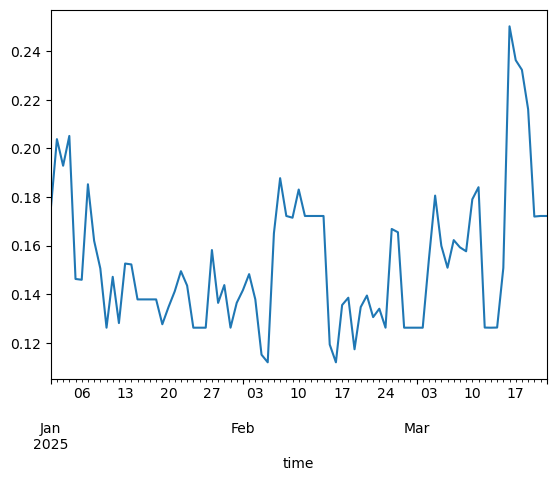

In [331]:
df.loc[mask_valid|mask_test|mask_test2, ['time', 'y_pred']].groupby(pd.Grouper(key='time', freq='D'))['y_pred'].mean().plot()

<Axes: xlabel='time'>

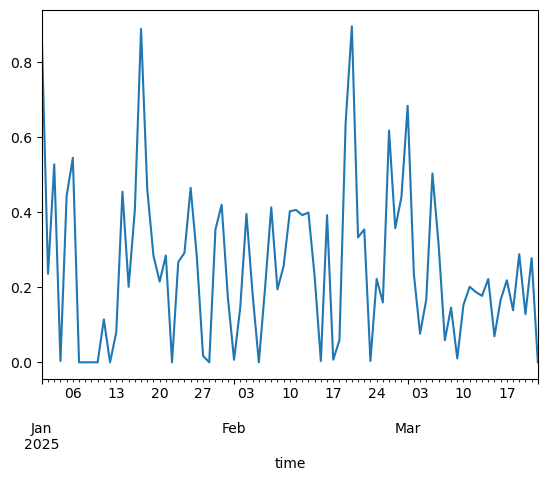

In [333]:
df.loc[mask_valid|mask_test|mask_test2, ['time', 'target']].groupby(pd.Grouper(key='time', freq='D'))['target'].mean().plot()

In [387]:
s = model.feature_importance(importance_type='gain').sum()
sorted(zip(features, np.round((model.feature_importance(importance_type='gain')/s*100), 2)), key=lambda x: -x[1])

[('close_1day_w60_expma/close_1day_w120_expma', 19.4),
 ('close/close_1day_w120_expma', 6.66),
 ('close/close_1hour_w30_expma', 6.13),
 ('close_1day_w30_expma/close_1day_w120_expma', 4.91),
 ('close_1day_w5_expma/close_1day_w10_expma', 4.8),
 ('close_1day_w10_expma/close_1day_w60_expma', 4.79),
 ('close_1day_w10_expma/close_1day_w30_expma', 4.43),
 ('close_1hour_w10_expma/close_1hour_w30_expma', 4.39),
 ('close_1day_w20_expma/close_1day_w120_expma', 4.18),
 ('close/close_1day_w10_expma', 4.15),
 ('close_1day_w30_expma/close_1day_w60_expma', 3.73),
 ('close_1day_w10_expma/close_1day_w120_expma', 3.72),
 ('close/close_1day_w30_expma', 3.62),
 ('close_1day_w5_expma/close_1day_w20_expma', 3.56),
 ('close_1hour_w20_expma/close_1hour_w60_expma', 2.89),
 ('close_1day_w20_expma/close_1day_w60_expma', 2.35),
 ('close/close_1hour_w20_expma', 2.34),
 ('close_1hour_w60_expma/close_1hour_w120_expma', 2.34),
 ('close_1day_w5_expma/close_1day_w30_expma', 1.64),
 ('close_1hour_w10_expma/close_1hour_w1

In [ ]:
y_pred_test3 = model.predict(D_test3.data)
df.loc[mask_test3, 'y_pred'] = y_pred_test3
roc_auc_score(D_test3.label, y_pred_test3)

In [561]:
threshold = np.quantile(df.loc[mask_valid, 'y_pred'], q=0.995)
mask = df['y_pred'] >= threshold

In [563]:
mean_income_rate_point(D_test3, y_pred_test3, threshold=threshold)

0.0019180774688720703

In [565]:
#0.0022104875426873782

In [567]:
mean_income_rate_tick(D_test3, y_pred_test3, threshold=threshold)

0.0019181581

In [569]:
#0.0018932624582072178

In [571]:
mean_income_rate_day(D_test3, y_pred_test3, threshold=threshold)

0.006865464

In [573]:
#0.002840009902855707

In [575]:
mean_income_rate_month(D_test3, y_pred_test3, threshold=threshold)

0.02797040950368952

In [577]:
#0.055903352824633386

In [579]:
(mask&mask_test3).sum()

51

In [581]:
df.loc[mask&mask_test3, 'time'].dt.date.nunique(), df.loc[mask_test3, 'time'].dt.date.nunique(),

(10, 54)

In [1109]:
pd.set_option('display.max_rows', 150)
df.loc[mask_test2&mask, ['ticker', 'income_rate']].groupby('ticker').apply(lambda x: pd.Series({'count' : x['income_rate'].count(),
                                                                                                               'income_rate' : x['income_rate'].mean()})).sort_values('count')

/var/folders/rm/zt5_90s5727289mv2gzbkw980000gn/T/ipykernel_93253/480691733.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.loc[mask_test2&mask, ['ticker', 'income_rate']].groupby('ticker').apply(lambda x: pd.Series({'count' : x['income_rate'].count(),


,count,income_rate
ticker,,
TATNP,1.0,1.014000
SNGS,1.0,1.014000
GMKN,2.0,1.014000
AQUA,2.0,1.005000
PLZL,2.0,0.996000
LENT,2.0,0.999206
TATN,3.0,1.002000
PHOR,3.0,1.008000
ROSN,4.0,1.005000


In [1112]:
i = 320
df.loc[mask&mask_test3, ['time', 'ticker','close', 'target', 'income_rate', 'delta_time']].iloc[i:i+20]

,time,ticker,close,target,income_rate,delta_time
2053675,2025-01-17 18:07:00,MVID,106.599998,1,1.014,0 days 01:39:00
2053782,2025-01-20 12:56:00,MVID,103.300003,0,0.996,0 days 00:05:00
2053784,2025-01-20 13:06:00,MVID,102.199997,0,0.996,0 days 00:05:00
2053785,2025-01-20 13:10:00,MVID,101.900002,1,1.014,0 days 01:14:00
2054160,2025-01-22 20:04:00,MVID,101.699997,0,0.996,0 days 00:02:00
2054162,2025-01-22 20:07:00,MVID,101.099998,1,1.014,0 days 00:52:00
2054163,2025-01-22 20:09:00,MVID,101.099998,1,1.014,0 days 00:50:00
2054164,2025-01-22 20:11:00,MVID,101.099998,1,1.014,0 days 00:48:00
2054448,2025-01-24 16:52:00,MVID,102.599998,0,1.009721,0 days 03:00:00
2056497,2025-02-14 12:18:00,MVID,115.099998,0,0.996,0 days 00:01:00


# 3.2 Tuning hyperparams

In [510]:
top_features = [elem[0] for elem in zip(features, model.feature_importance(importance_type='gain')) if elem[1] > 0]
top_cat_features = [elem for elem in top_features if elem in cat_features]

In [512]:
len(top_features), len(top_cat_features)

(6, 0)

In [514]:
top_features

['close/close_w10_ma',
 'close/close_w30_ma',
 'close/close_w10_expma',
 'close/close_w30_expma',
 'close_w10_max/close',
 'close/close_1hour_w10_expma']

In [295]:
D_train = lgbm.Dataset(df.loc[mask_train, top_features], label=df.loc[mask_train, target], feature_name=top_features, categorical_feature=top_cat_features, free_raw_data=False)
D_valid = lgbm.Dataset(df.loc[mask_valid, top_features], label=df.loc[mask_valid, target], feature_name=top_features, categorical_feature=top_cat_features, free_raw_data=False)
D_test = lgbm.Dataset(df.loc[mask_test, top_features], label=df.loc[mask_test, target], feature_name=top_features, categorical_feature=top_cat_features, free_raw_data=False)
D_test2 = lgbm.Dataset(df.loc[mask_test2, top_features], label=df.loc[mask_test2, target], feature_name=top_features, categorical_feature=top_cat_features, free_raw_data=False)

D_train.income_rate = df.loc[mask_train, 'income_rate'].values
D_valid.income_rate = df.loc[mask_valid, 'income_rate'].values
D_test.income_rate = df.loc[mask_test, 'income_rate'].values
D_test2.income_rate = df.loc[mask_test2, 'income_rate'].values

D_train.time = df.loc[mask_train, 'time'].values
D_valid.time = df.loc[mask_valid, 'time'].values
D_test.time = df.loc[mask_test, 'time'].values
D_test2.time = df.loc[mask_test2, 'time'].values

In [518]:
#D_train.data

In [297]:
D_train.data.shape

(1446127, 6)

In [299]:
params

{'boosting_type': 'gbdt',
 'objective': 'binary',
 'num_boost_round': 1000,
 'num_leaves': 5,
 'feature_fraction': 0.3,
 'bagging_fraction': 0.3,
 'bagging_freq': 1,
 'lambda_l1': 100,
 'lambda_l2': 100,
 'metric': 'mean_income_rate',
 'early_stopping': 10}

In [301]:
from IPython.display import clear_output

history = {'params' : [],
           'num_trees' : [],

          
           'auc_train' : [],
           'auc_valid' : [],
           'auc_test' : [],
           'auc_test2' : [],

          
           'mir_point@1_train' : [],
           'mir_point@1_valid' : [],
           'mir_point@1_test' : [],
           'mir_point@1_test2' : [],

           'mir_day@1_train' : [],
           'mir_day@1_valid' : [],
           'mir_day@1_test' : [],
           'mir_day@1_test2' : [],

           'mir_month@1_train' : [],
           'mir_month@1_valid' : [],
           'mir_month@1_test' : [],
           'mir_month@1_test2' : [],
           
           'mir_point@2_train' : [],
           'mir_point@2_valid' : [],
           'mir_point@2_test' : [],
           'mir_point@2_test2' : [],
          
           
           'mir_day@2_train' : [],
           'mir_day@2_valid' : [],
           'mir_day@2_test' : [],
           'mir_day@2_test2' : [],


           'mir_month@2_train' : [],
           'mir_month@2_valid' : [],
           'mir_month@2_test' : [],
           'mir_month@2_test2' : [],
          
          }



pbar = tqdm(total=4*1*3*8*8)
# for lambda_x in [0.001, 0.01, 0.1, 1]:
#     for learning_rate in [0.1, 0.01, 0.001]:
#         for num_leaves in [2, 4, 8, 16, 32]:
#             for feature_fraction in np.arange(1, 0, -0.1):
#                 for bagging_fraction in np.arange(1, 0, -0.1):
for lambda_x in [1, 10, 100, 1000]:
    for learning_rate in [0.1]:
        for num_leaves in [2, 5, 8]:
            for feature_fraction in np.arange(0.3, 1.1, 0.1)[::-1]:
                for bagging_fraction in np.arange(0.3, 1.1, 0.1)[::-1]:
                    feature_fraction = min(feature_fraction, 1)
                    bagging_fraction = min(bagging_fraction, 1)

                    
                    params = {
                                "boosting_type": "gbdt",
                                "objective": "binary",
                            
                                
                                 "num_leaves": num_leaves,
                                 "learning_rate": learning_rate,
                                 "feature_fraction": feature_fraction,
                                 "bagging_fraction": bagging_fraction,
                                 "bagging_freq": 1,
                                 'lambda_l1' : lambda_x,
                                 'lambda_l2' : lambda_x,
                                
                                "verbose": -1,
                                    
                                "metric": 'mean_income_rate',
                                "early_stopping" : 10,
                            }
                    model = lgbm.train(params, num_boost_round=1_000, train_set=D_train, valid_sets=[D_valid], feval=mean_income_rate)
                    
                    y_pred_train = model.predict(D_train.data)
                    y_pred_valid = model.predict(D_valid.data)
                    y_pred_test = model.predict(D_test.data)
                    y_pred_test2 = model.predict(D_test2.data)
                    
                    #history
                    history['params'] += [params.copy()]
                    history['num_trees'] += [model.num_trees()]
        
                    history['auc_train'] += [roc_auc_score(D_train.label, y_pred_train)]
                    history['auc_valid'] += [roc_auc_score(D_valid.label, y_pred_valid)]
                    history['auc_test'] += [roc_auc_score(D_test.label, y_pred_test)]
                    history['auc_test2'] += [roc_auc_score(D_test2.label, y_pred_test2)]


                    threshold1 = np.quantile(y_pred_valid, q=0.99)
                    threshold2 = np.quantile(y_pred_valid, q=0.95)
                    
                    history['mir_point@1_train'] += [mean_income_rate_point(D_train, y_pred_train, threshold=threshold1)]
                    history['mir_point@1_valid'] += [mean_income_rate_point(D_valid, y_pred_valid, threshold=threshold1)]
                    history['mir_point@1_test'] += [mean_income_rate_point(D_test, y_pred_test, threshold=threshold1)]
                    history['mir_point@1_test2'] += [mean_income_rate_point(D_test2, y_pred_test2, threshold=threshold1)]

                    history['mir_day@1_train'] += [mean_income_rate_day(D_train, y_pred_train, threshold=threshold1)]
                    history['mir_day@1_valid'] += [mean_income_rate_day(D_valid, y_pred_valid, threshold=threshold1)]
                    history['mir_day@1_test'] += [mean_income_rate_day(D_test, y_pred_test, threshold=threshold1)]
                    history['mir_day@1_test2'] += [mean_income_rate_day(D_test2, y_pred_test2, threshold=threshold1)]
                    
                    history['mir_month@1_train'] += [mean_income_rate_month(D_train, y_pred_train, threshold=threshold1)]
                    history['mir_month@1_valid'] += [mean_income_rate_month(D_valid, y_pred_valid, threshold=threshold1)]
                    history['mir_month@1_test'] += [mean_income_rate_month(D_test, y_pred_test, threshold=threshold1)]
                    history['mir_month@1_test2'] += [mean_income_rate_month(D_test2, y_pred_test2, threshold=threshold1)]


                    

                    history['mir_point@2_train'] += [mean_income_rate_point(D_train, y_pred_train, threshold=threshold2)]
                    history['mir_point@2_valid'] += [mean_income_rate_point(D_valid, y_pred_valid, threshold=threshold2)]
                    history['mir_point@2_test'] += [mean_income_rate_point(D_test, y_pred_test, threshold=threshold2)]
                    history['mir_point@2_test2'] += [mean_income_rate_point(D_test2, y_pred_test2, threshold=threshold2)]

                    history['mir_day@2_train'] += [mean_income_rate_day(D_train, y_pred_train, threshold=threshold2)]
                    history['mir_day@2_valid'] += [mean_income_rate_day(D_valid, y_pred_valid, threshold=threshold2)]
                    history['mir_day@2_test'] += [mean_income_rate_day(D_test, y_pred_test, threshold=threshold2)]
                    history['mir_day@2_test2'] += [mean_income_rate_day(D_test2, y_pred_test2, threshold=threshold2)]
                   
                    history['mir_month@2_train'] += [mean_income_rate_month(D_train, y_pred_train, threshold=threshold2)]
                    history['mir_month@2_valid'] += [mean_income_rate_month(D_valid, y_pred_valid, threshold=threshold2)]
                    history['mir_month@2_test'] += [mean_income_rate_month(D_test, y_pred_test, threshold=threshold2)]
                    history['mir_month@2_test2'] += [mean_income_rate_month(D_test2, y_pred_test2, threshold=threshold2)]


                    
                    clear_output()
                    pbar.update(1)
                    
pbar.close()
                    

history_cp = history.copy()

100%|███████████████████████████████████████████████████████████████████████| 768/768 [24:24<00:00,  1.91s/it]


In [302]:
dump_pkl(history, './hst_-0.5_+1.5_4hour.pkl')

In [5173]:
history = load_pkl('./hst_-0.5_+1.5_4hour.pkl')

In [305]:
pd.set_option('display.max_columns', 100)
order_cols = ['params', 'num_trees', 'auc_train', 'auc_valid', 'auc_test', 'auc_test2', 'mir_point@1_train', 'mir_point@1_valid', 'mir_point@1_test', 'mir_point@1_test2', 'mir_day@1_train', 'mir_day@1_valid', 'mir_day@1_test', 'mir_day@1_test2', 'mir_month@1_train', 'mir_month@1_valid', 'mir_month@1_test', 'mir_month@1_test2', 'mir_point@2_train', 'mir_point@2_valid', 'mir_point@2_test', 'mir_point@2_test2', 'mir_day@2_train', 'mir_day@2_valid', 'mir_day@2_test', 'mir_day@2_test2', 'mir_month@2_train', 'mir_month@2_valid', 'mir_month@2_test', 'mir_month@2_test2']
df_hst = pd.DataFrame(history)[order_cols]
df_hst

,params,num_trees,auc_train,auc_valid,auc_test,auc_test2,mir_point@1_train,mir_point@1_valid,mir_point@1_test,mir_point@1_test2,mir_day@1_train,mir_day@1_valid,mir_day@1_test,mir_day@1_test2,mir_month@1_train,mir_month@1_valid,mir_month@1_test,mir_month@1_test2,mir_point@2_train,mir_point@2_valid,mir_point@2_test,mir_point@2_test2,mir_day@2_train,mir_day@2_valid,mir_day@2_test,mir_day@2_test2,mir_month@2_train,mir_month@2_valid,mir_month@2_test,mir_month@2_test2
0,"{'boosting_type': 'gbdt', 'objective': 'binary...",32,0.642828,0.601831,0.604062,0.573098,0.001818,0.000462,0.001205,0.001078,0.002228,0.002875,0.001664,0.002351,0.044984,0.061846,0.035775,0.048117,0.001045,-0.000154,0.000716,0.000442,0.001309,0.001190,0.001221,0.001036,0.028273,0.026170,0.026858,0.022253
1,"{'boosting_type': 'gbdt', 'objective': 'binary...",12,0.624520,0.594835,0.593708,0.566168,0.001578,-0.000001,0.000883,0.000358,0.002120,0.002219,0.001986,0.001947,0.044832,0.048824,0.043693,0.041837,0.001107,-0.000167,0.000726,0.000363,0.001488,0.001371,0.001372,0.001344,0.032136,0.030159,0.030182,0.028872
2,"{'boosting_type': 'gbdt', 'objective': 'binary...",14,0.626674,0.595243,0.594842,0.567469,0.001568,0.000011,0.000855,0.000352,0.002111,0.002228,0.001943,0.002014,0.044649,0.049007,0.042757,0.043287,0.001086,-0.000149,0.000659,0.000397,0.001341,0.001297,0.001263,0.001173,0.028894,0.028533,0.027776,0.025214
3,"{'boosting_type': 'gbdt', 'objective': 'binary...",32,0.642618,0.602215,0.604165,0.573116,0.001816,0.000462,0.001205,0.001078,0.002225,0.002875,0.001664,0.002351,0.044917,0.061846,0.035775,0.048117,0.001112,-0.000048,0.000661,0.000482,0.001318,0.001354,0.001199,0.001266,0.028341,0.029791,0.026379,0.027208
4,"{'boosting_type': 'gbdt', 'objective': 'binary...",10,0.617723,0.591128,0.589091,0.565039,0.001502,-0.000055,0.000962,0.000699,0.002023,0.001818,0.001698,0.002219,0.042888,0.039997,0.037346,0.047687,0.001042,-0.000244,0.000668,0.000324,0.001368,0.001185,0.001246,0.001124,0.029548,0.026070,0.027405,0.024147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,"{'boosting_type': 'gbdt', 'objective': 'binary...",38,0.650277,0.609061,0.604311,0.571548,0.002125,0.000098,0.001321,0.000950,0.003508,0.002798,0.002544,0.003683,0.068550,0.061556,0.053415,0.077247,0.001283,-0.000278,0.000774,0.000358,0.001904,0.001339,0.001942,0.001856,0.041122,0.029459,0.042714,0.040831
764,"{'boosting_type': 'gbdt', 'objective': 'binary...",44,0.650052,0.608623,0.604188,0.571333,0.002126,0.000098,0.001321,0.000950,0.003510,0.002798,0.002544,0.003683,0.068583,0.061556,0.053415,0.077247,0.001260,-0.000284,0.000732,0.000358,0.001782,0.001320,0.001809,0.001645,0.038478,0.029041,0.039788,0.035356
765,"{'boosting_type': 'gbdt', 'objective': 'binary...",40,0.649431,0.608804,0.603635,0.570874,0.002059,0.000033,0.001234,0.000853,0.003516,0.002778,0.002727,0.003524,0.071165,0.061117,0.058629,0.073929,0.001275,-0.000337,0.000775,0.000346,0.001907,0.001209,0.001973,0.001705,0.041279,0.026590,0.043408,0.036640
766,"{'boosting_type': 'gbdt', 'objective': 'binary...",21,0.646752,0.605981,0.599423,0.567547,0.001376,-0.000296,0.000865,0.000257,0.002461,0.001897,0.002538,0.002551,0.051788,0.041732,0.055830,0.054815,0.001235,-0.000389,0.000775,0.000211,0.002470,0.001610,0.002609,0.002466,0.052599,0.035425,0.057401,0.052998


### threshold delta AUC

In [310]:
threshold = 0.03
mask_model_valid = (df_hst['auc_train'] - df_hst['auc_valid']) < threshold
mask_model_test = (df_hst['auc_train'] - df_hst['auc_test']) < threshold
mask_model_test2 = (df_hst['auc_train'] - df_hst['auc_test2']) < threshold
mask_model_valid.sum(), mask_model_test.sum(), mask_model_test2.sum()

(115, 15, 0)

In [312]:
(mask_model_valid&mask_model_test).sum(), (mask_model_valid&mask_model_test&mask_model_test2).sum()

(14, 0)

In [314]:
mask_auc = mask_model_valid&mask_model_test#&mask_model_test2
df_hst.loc[mask_auc].sort_values(by='auc_valid', ascending=False).iloc[:5]
#df_hst.loc[mask_model_valid&mask_model_test].sort_values(by='income_rate@1_valid', ascending=False).iloc[:5]

,params,num_trees,auc_train,auc_valid,auc_test,auc_test2,mir_point@1_train,mir_point@1_valid,mir_point@1_test,mir_point@1_test2,mir_day@1_train,mir_day@1_valid,mir_day@1_test,mir_day@1_test2,mir_month@1_train,mir_month@1_valid,mir_month@1_test,mir_month@1_test2,mir_point@2_train,mir_point@2_valid,mir_point@2_test,mir_point@2_test2,mir_day@2_train,mir_day@2_valid,mir_day@2_test,mir_day@2_test2,mir_month@2_train,mir_month@2_valid,mir_month@2_test,mir_month@2_test2
4,"{'boosting_type': 'gbdt', 'objective': 'binary...",10,0.617723,0.591128,0.589091,0.565039,0.001502,-0.000055,0.000962,0.000699,0.002023,0.001818,0.001698,0.002219,0.042888,0.039997,0.037346,0.047687,0.001042,-0.000244,0.000668,0.000324,0.001368,0.001185,0.001246,0.001124,0.029548,0.026070,0.027405,0.024147
397,"{'boosting_type': 'gbdt', 'objective': 'binary...",9,0.614175,0.587564,0.585836,0.563168,0.001278,-0.000181,0.000702,0.000324,0.001749,0.001526,0.001452,0.001659,0.037608,0.033570,0.031938,0.035656,0.001076,-0.000260,0.000797,0.000329,0.001434,0.001156,0.001319,0.001193,0.031036,0.025436,0.029018,0.025635
405,"{'boosting_type': 'gbdt', 'objective': 'binary...",9,0.614175,0.587564,0.585836,0.563168,0.001278,-0.000181,0.000702,0.000324,0.001749,0.001526,0.001452,0.001659,0.037608,0.033570,0.031938,0.035656,0.001076,-0.000260,0.000797,0.000329,0.001434,0.001156,0.001319,0.001193,0.031036,0.025436,0.029018,0.025635
438,"{'boosting_type': 'gbdt', 'objective': 'binary...",7,0.605522,0.581058,0.576780,0.559037,0.001577,-0.000232,0.001056,0.000449,0.002718,0.001906,0.002462,0.002499,0.057609,0.041942,0.054162,0.053689,0.001260,-0.000342,0.000763,0.000244,0.001968,0.001341,0.002034,0.001641,0.042499,0.029511,0.044758,0.035265
446,"{'boosting_type': 'gbdt', 'objective': 'binary...",7,0.605522,0.581058,0.576780,0.559037,0.001577,-0.000232,0.001056,0.000449,0.002718,0.001906,0.002462,0.002499,0.057609,0.041942,0.054162,0.053689,0.001260,-0.000342,0.000763,0.000244,0.001968,0.001341,0.002034,0.001641,0.042499,0.029511,0.044758,0.035265


In [319]:
#df_hst['params'].iloc[1033]

### threshold income_rate

In [1601]:
col = 'mir_month@1'
threshold = 0.06
# mask_ir_valid = (df_hst[f'{col}_train'] - df_hst[f'{col}_valid']).abs() < threshold
# mask_ir_test = (df_hst[f'{col}_train'] - df_hst[f'{col}_test']).abs() < threshold
# mask_ir_test2 = (df_hst[f'{col}_train'] - df_hst[f'{col}_test2']).abs() < threshold

mask_ir_valid = df_hst[f'{col}_valid'] >=  threshold
mask_ir_test = df_hst[f'{col}_test'] >= threshold
mask_ir_test2 = df_hst[f'{col}_test2'] >=  threshold


mask_ir_valid.sum(), mask_ir_test.sum(), mask_ir_test2.sum()

(495, 251, 480)

In [1603]:
(mask_ir_valid&mask_ir_test).sum(), (mask_ir_valid&mask_ir_test&mask_ir_test2).sum()

(240, 197)

In [1605]:
mask_ir= mask_ir_valid&mask_ir_test&mask_ir_test2
mask_ir.sum()



197

In [1607]:
#(mask_ir&mask_auc).sum()

In [1609]:
col = 'mir_day@1'
threshold = 0.003

# mask2_ir_valid = (df_hst[f'{col}_train'] - df_hst[f'{col}_valid']).abs() < threshold
# mask2_ir_test = (df_hst[f'{col}_train'] - df_hst[f'{col}_test']).abs() < threshold
# mask2_ir_test2 = (df_hst[f'{col}_train'] - df_hst[f'{col}_test2']).abs() < threshold

mask2_ir_valid = df_hst[f'{col}_valid'] >=  threshold
mask2_ir_test = df_hst[f'{col}_test'] >= threshold
mask2_ir_test2 = df_hst[f'{col}_test2'] >=  threshold


mask2_ir_valid.sum(), mask2_ir_test.sum(), mask2_ir_test2.sum()

(378, 237, 524)

In [1611]:
(mask2_ir_valid&mask2_ir_test).sum(), (mask2_ir_valid&mask2_ir_test&mask2_ir_test2).sum()

(231, 231)

In [1613]:
mask2_ir = mask2_ir_valid&mask2_ir_test&mask2_ir_test2
mask2_ir.sum()

231

In [1616]:
(mask_ir&mask2_ir).sum()

173

In [1620]:
# col = 'mir_point@1'
# threshold = 0.003

# # mask2_ir_valid = (df_hst[f'{col}_train'] - df_hst[f'{col}_valid']).abs() < threshold
# # mask2_ir_test = (df_hst[f'{col}_train'] - df_hst[f'{col}_test']).abs() < threshold
# # mask2_ir_test2 = (df_hst[f'{col}_train'] - df_hst[f'{col}_test2']).abs() < threshold

# mask3_ir_valid = df_hst[f'{col}_valid'] >=  threshold
# mask3_ir_test = df_hst[f'{col}_test'] >= threshold
# mask3_ir_test2 = df_hst[f'{col}_test2'] >=  threshold


# mask3_ir_valid.sum(), mask3_ir_test.sum(), mask3_ir_test2.sum()

In [1622]:
# (mask3_ir_valid&mask3_ir_test).sum(), (mask3_ir_valid&mask3_ir_test&mask3_ir_test2).sum()

In [1624]:
# mask3_ir = mask3_ir_valid&mask3_ir_test&mask3_ir_test2
# mask3_ir.sum()

In [1627]:
# (mask_ir&mask2_ir&mask3_ir).sum()

In [1630]:
mask = mask_ir&mask2_ir#&mask3_ir
df_hst.loc[mask].sort_values(by=f'mir_day@1_valid', ascending=False).iloc[:10]

,params,num_trees,auc_train,auc_valid,auc_test,auc_test2,mir_point@1_train,mir_point@1_valid,mir_point@1_test,mir_point@1_test2,mir_day@1_train,mir_day@1_valid,mir_day@1_test,mir_day@1_test2,mir_month@1_train,mir_month@1_valid,mir_month@1_test,mir_month@1_test2,mir_point@2_train,mir_point@2_valid,mir_point@2_test,mir_point@2_test2,mir_day@2_train,mir_day@2_valid,mir_day@2_test,mir_day@2_test2,mir_month@2_train,mir_month@2_valid,mir_month@2_test,mir_month@2_test2
149,"{'boosting_type': 'gbdt', 'objective': 'binary...",27,0.662656,0.620916,0.618368,0.580464,0.002764,0.000832,0.002166,0.001638,0.004270,0.004005,0.003285,0.003697,0.075058,0.078319,0.064053,0.068101,0.000965,-0.000080,0.000294,0.001144,0.000768,0.000749,0.000319,0.000508,0.016664,0.016485,0.007026,0.011167
141,"{'boosting_type': 'gbdt', 'objective': 'binary...",27,0.662656,0.620916,0.618368,0.580464,0.002764,0.000832,0.002166,0.001638,0.004270,0.004005,0.003285,0.003697,0.075058,0.078319,0.064053,0.068101,0.000965,-0.000080,0.000294,0.001144,0.000768,0.000749,0.000319,0.000508,0.016664,0.016485,0.007026,0.011167
133,"{'boosting_type': 'gbdt', 'objective': 'binary...",19,0.660552,0.619019,0.616073,0.578822,0.002484,0.000758,0.001836,0.001296,0.004033,0.003848,0.003362,0.003461,0.069286,0.073378,0.063875,0.063739,0.000957,-0.000045,0.000408,0.001078,0.000726,0.000841,0.000432,0.000549,0.015754,0.018499,0.009496,0.012070
132,"{'boosting_type': 'gbdt', 'objective': 'binary...",13,0.657334,0.615430,0.614047,0.578545,0.002492,0.000723,0.001822,0.001298,0.004081,0.003830,0.003400,0.003451,0.067848,0.073021,0.064603,0.061791,0.000953,-0.000063,0.000454,0.000925,0.000759,0.000765,0.000467,0.000626,0.016514,0.016826,0.010268,0.013777
323,"{'boosting_type': 'gbdt', 'objective': 'binary...",14,0.658119,0.615756,0.613767,0.578116,0.002305,0.000698,0.001816,0.001323,0.003856,0.003826,0.003341,0.003497,0.066235,0.072947,0.063472,0.062622,0.000924,-0.000072,0.000363,0.000958,0.000699,0.000743,0.000403,0.000465,0.015164,0.016346,0.008875,0.010224
350,"{'boosting_type': 'gbdt', 'objective': 'binary...",14,0.656749,0.614607,0.610878,0.576726,0.002317,0.000736,0.001861,0.001322,0.003801,0.003800,0.003095,0.003476,0.066637,0.072459,0.061893,0.064015,0.001042,-0.000034,0.000460,0.000640,0.000973,0.000975,0.000752,0.000678,0.020968,0.021449,0.016542,0.014906
358,"{'boosting_type': 'gbdt', 'objective': 'binary...",14,0.656749,0.614607,0.610878,0.576726,0.002317,0.000736,0.001861,0.001322,0.003801,0.003800,0.003095,0.003476,0.066637,0.072459,0.061893,0.064015,0.001042,-0.000034,0.000460,0.000640,0.000973,0.000975,0.000752,0.000678,0.020968,0.021449,0.016542,0.014906
115,"{'boosting_type': 'gbdt', 'objective': 'binary...",23,0.650355,0.610127,0.604407,0.573714,0.002512,0.000719,0.002395,0.001489,0.004042,0.003798,0.003668,0.003387,0.071464,0.074269,0.075190,0.064125,0.000980,-0.000166,0.000454,0.000533,0.000939,0.000735,0.000927,0.000615,0.020278,0.016178,0.020397,0.013528
123,"{'boosting_type': 'gbdt', 'objective': 'binary...",23,0.650355,0.610127,0.604407,0.573714,0.002512,0.000719,0.002395,0.001489,0.004042,0.003798,0.003668,0.003387,0.071464,0.074269,0.075190,0.064125,0.000980,-0.000166,0.000454,0.000533,0.000939,0.000735,0.000927,0.000615,0.020278,0.016178,0.020397,0.013528
317,"{'boosting_type': 'gbdt', 'objective': 'binary...",21,0.649381,0.608174,0.603421,0.572557,0.002337,0.000733,0.002015,0.001329,0.003703,0.003793,0.003041,0.003508,0.065663,0.072323,0.060829,0.064621,0.001178,-0.000119,0.000655,0.000379,0.001424,0.001118,0.001489,0.000903,0.030691,0.024589,0.032765,0.019869


In [1632]:
df_hst.iloc[[111, 149]]

,params,num_trees,auc_train,auc_valid,auc_test,auc_test2,mir_point@1_train,mir_point@1_valid,mir_point@1_test,mir_point@1_test2,mir_day@1_train,mir_day@1_valid,mir_day@1_test,mir_day@1_test2,mir_month@1_train,mir_month@1_valid,mir_month@1_test,mir_month@1_test2,mir_point@2_train,mir_point@2_valid,mir_point@2_test,mir_point@2_test2,mir_day@2_train,mir_day@2_valid,mir_day@2_test,mir_day@2_test2,mir_month@2_train,mir_month@2_valid,mir_month@2_test,mir_month@2_test2
111,"{'boosting_type': 'gbdt', 'objective': 'binary...",17,0.652944,0.610673,0.608529,0.576003,0.002316,0.000534,0.001741,0.001280,0.003945,0.003393,0.003930,0.003674,0.069954,0.069660,0.082540,0.073317,0.001126,-0.000135,0.000515,0.000352,0.001299,0.001204,0.001439,0.000930,0.027986,0.026483,0.031652,0.020449
149,"{'boosting_type': 'gbdt', 'objective': 'binary...",27,0.662656,0.620916,0.618368,0.580464,0.002764,0.000832,0.002166,0.001638,0.004270,0.004005,0.003285,0.003697,0.075058,0.078319,0.064053,0.068101,0.000965,-0.000080,0.000294,0.001144,0.000768,0.000749,0.000319,0.000508,0.016664,0.016485,0.007026,0.011167


In [1636]:
df_hst['params'].iloc[149]

{'boosting_type': 'gbdt',
 'objective': 'binary',
 'num_leaves': 8,
 'learning_rate': 0.1,
 'feature_fraction': 0.8000000000000002,
 'bagging_fraction': 0.5,
 'bagging_freq': 1,
 'lambda_l1': 1,
 'lambda_l2': 1,
 'verbose': -1,
 'metric': 'mean_income_rate',
 'early_stopping': 10}

# Feature selection

In [1640]:
len(top_features), top_features

(6,
 ['close/close_w10_ma',
  'close/close_w30_ma',
  'close/close_w10_expma',
  'close/close_w30_expma',
  'close_w10_max/close',
  'close/close_1hour_w10_expma'])

In [1709]:
top_features = ['close/close_w10_ma',
  'close/close_w30_ma',
  'close/close_w10_expma',
  'close/close_w30_expma',
  'close_w10_max/close',
  'close/close_1hour_w10_expma']

In [1711]:
#features = features_criteria2.tolist()
features = top_features


cat_features = [elem for elem in features if elem in cat_features_all]

In [1713]:
len(features), len(cat_features)

(6, 0)

In [1715]:
'ticker_code' in features

False

In [1717]:
target = 'target'

In [1719]:
D_train = lgbm.Dataset(df.loc[mask_train, features], label=df.loc[mask_train, target], feature_name=features, categorical_feature=cat_features, free_raw_data=False)
D_valid = lgbm.Dataset(df.loc[mask_valid, features], label=df.loc[mask_valid, target], feature_name=features, categorical_feature=cat_features, free_raw_data=False)
D_test = lgbm.Dataset(df.loc[mask_test, features], label=df.loc[mask_test, target], feature_name=features, categorical_feature=cat_features, free_raw_data=False)
D_test2 = lgbm.Dataset(df.loc[mask_test2, features], label=df.loc[mask_test2, target], feature_name=features, categorical_feature=cat_features, free_raw_data=False)


D_train.income_rate = df.loc[mask_train, 'income_rate'].values
D_valid.income_rate = df.loc[mask_valid, 'income_rate'].values
D_test.income_rate = df.loc[mask_test, 'income_rate'].values
D_test2.income_rate = df.loc[mask_test2, 'income_rate'].values

D_train.time = df.loc[mask_train, 'time'].values
D_valid.time = df.loc[mask_valid, 'time'].values
D_test.time = df.loc[mask_test, 'time'].values
D_test2.time = df.loc[mask_test2, 'time'].values

In [1720]:
D_test2.data

,close/close_w10_ma,close/close_w30_ma,close/close_w10_expma,close/close_w30_expma,close_w10_max/close,close/close_1hour_w10_expma
34250,1.004638,1.011641,1.005106,1.008195,1.000000,1.007999
34251,1.002253,1.009579,1.002815,1.006102,1.001658,1.006331
34252,1.004541,1.011769,1.004415,1.008132,1.000000,1.008926
34253,0.997600,1.004561,0.997873,1.001022,1.007032,1.001539
34254,0.995200,1.001970,0.996293,0.998703,1.009460,0.999129
...,...,...,...,...,...,...
2338926,1.001332,1.001260,1.000852,1.001409,1.000190,1.002039
2338927,1.001014,1.001202,1.000697,1.001318,1.000190,1.002039
2338928,0.998173,0.998298,0.998102,0.998409,1.003214,0.998649
2338929,1.000872,1.001328,1.000916,1.001335,1.000190,1.001668


In [1983]:
params = { 'boosting_type': 'gbdt',
 'objective': 'binary',
 'num_leaves': 5,
 'learning_rate': 0.1,
 'feature_fraction': 0.5,
 'bagging_fraction': 0.3,
 'bagging_freq': 1,
 'lambda_l1': 1,
 'lambda_l2': 1,
 'verbose': -1,
 'metric': 'mean_income_rate',
 'early_stopping': 10}

# {'boosting_type': 'gbdt',
#  'objective': 'binary',
#  'num_leaves': 8,
#  'learning_rate': 0.1,
#  'feature_fraction': 0.8,
#  'bagging_fraction': 0.5,
#  'bagging_freq': 1,
#  'lambda_l1': 1,
#  'lambda_l2': 1,
#  'verbose': -1,
#  'metric': 'mean_income_rate',
#  'early_stopping': 10}

# #111 - num_trees=17
# {'boosting_type': 'gbdt',
#  'objective': 'binary',
#  'num_leaves': 5,
#  'learning_rate': 0.1,
#  'feature_fraction': 0.5,
#  'bagging_fraction': 0.3,
#  'bagging_freq': 1,
#  'lambda_l1': 1,
#  'lambda_l2': 1,
#  'verbose': -1,
#  'metric': 'mean_income_rate',
#  'early_stopping': 10}

model = lgbm.train(params,  num_boost_round=2_000, train_set=D_train, valid_sets=[D_valid], feval=mean_income_rate)

In [1985]:
model.num_trees()

17

In [1988]:
y_pred_train = model.predict(D_train.data)
y_pred_valid = model.predict(D_valid.data)
y_pred_test = model.predict(D_test.data)
y_pred_test2 = model.predict(D_test2.data)


df["y_pred"] = None
df.loc[mask_train, 'y_pred'] = y_pred_train
df.loc[mask_valid, 'y_pred'] = y_pred_valid
df.loc[mask_test, 'y_pred'] = y_pred_test
df.loc[mask_test2, 'y_pred'] = y_pred_test2

roc_auc_score(D_train.label, y_pred_train), roc_auc_score(D_valid.label, y_pred_valid), roc_auc_score(D_test.label, y_pred_test), roc_auc_score(D_test2.label, y_pred_test2)


(0.652944363854863, 0.6106727017819044, 0.6085286847042677, 0.5760034988223279)

In [1989]:
#свой threshold

q = 0.99

threshold = np.quantile(df.loc[mask_valid, 'y_pred'], q=q)
mask = df['y_pred'] >= threshold
print('\nValid')
print(df.loc[mask_valid&mask, 'result'].value_counts(normalize=True))
print(df.loc[mask_valid&mask, 'income_rate'].mean())

threshold = np.quantile(df.loc[mask_test, 'y_pred'], q=q)
mask = df['y_pred'] >= threshold
print('\nTest')
print(df.loc[mask_test&mask, 'result'].value_counts(normalize=True))
print(df.loc[mask_test&mask, 'income_rate'].mean())

threshold = np.quantile(df.loc[mask_test2, 'y_pred'], q=q)
mask = df['y_pred'] >= threshold
print('\nTest2')
print(df.loc[mask_test2&mask, 'result'].value_counts(normalize=True))
print(df.loc[mask_test2&mask, 'income_rate'].mean())


Valid
result
LOSE    0.602980
WIN     0.266631
DNF     0.130389
Name: proportion, dtype: float64
1.0005339

Test
result
LOSE    0.534453
WIN     0.280834
DNF     0.184713
Name: proportion, dtype: float64
1.0013725

Test2
result
LOSE    0.532609
WIN     0.292271
DNF     0.175121
Name: proportion, dtype: float64
1.0013669


In [1990]:
df.loc[mask_valid&mask, 'delta_time'].median(), df.loc[mask_test&mask, 'delta_time'].median(), df.loc[mask_test2&mask, 'delta_time'].median()

(Timedelta('0 days 01:00:00'),
 Timedelta('0 days 01:15:00'),
 Timedelta('0 days 01:00:00'))

In [1995]:
#общий threshold

threshold = np.quantile(df.loc[mask_valid, 'y_pred'], q=q)
print(f'threshokd = {threshold}')

mask = df['y_pred'] >= threshold
print('\nValid')
print(df.loc[mask_valid&mask, 'result'].value_counts(normalize=True))
print(df.loc[mask_valid&mask, 'income_rate'].mean())

#threshold = np.quantile(df.loc[mask_test, 'y_pred'], q=0.99)
#mask = df['y_pred'] > threshold
print("\nTest")
print(df.loc[mask_test&mask, 'result'].value_counts(normalize=True))
print(df.loc[mask_test&mask, 'income_rate'].mean())

#threshold = np.quantile(df.loc[mask_test2, 'y_pred'], q=0.99)
#mask = df['y_pred'] > threshold
print('\nTetst2')
print(df.loc[mask_test2&mask, 'result'].value_counts(normalize=True))
print(df.loc[mask_test2&mask, 'income_rate'].mean())

threshokd = 0.2591240486482249

Valid
result
LOSE    0.602980
WIN     0.266631
DNF     0.130389
Name: proportion, dtype: float64
1.0005339

Test
result
LOSE    0.530280
WIN     0.310559
DNF     0.159161
Name: proportion, dtype: float64
1.0017412

Tetst2
result
LOSE    0.543643
WIN     0.296907
DNF     0.159450
Name: proportion, dtype: float64
1.0012803


In [1997]:
df.loc[mask_valid&mask, 'delta_time'].median(), df.loc[mask_test&mask, 'delta_time'].median(), df.loc[mask_test2&mask, 'delta_time'].median()

(Timedelta('0 days 01:00:00'),
 Timedelta('0 days 01:00:00'),
 Timedelta('0 days 01:00:00'))

In [1999]:
(mask_valid&mask).sum(), (mask_test&mask).sum(), (mask_test2&mask).sum()

(1879, 1288, 1455)

In [2001]:
df.loc[mask_valid&mask, 'time'].dt.date.nunique(), df.loc[mask_test&mask, 'time'].dt.date.nunique(), df.loc[mask_test2&mask, 'time'].dt.date.nunique()


(42, 42, 39)

In [2004]:
threshold = np.quantile(df.loc[mask_valid, 'y_pred'], q=0.99)

In [2006]:
mean_income_rate_point(D_valid, y_pred_valid, threshold=threshold), mean_income_rate_point(D_test, y_pred_test, threshold=threshold), mean_income_rate_point(D_test2, y_pred_test2, threshold=threshold)

(0.0005339384078979492, 0.001741170883178711, 0.0012803077697753906)

In [2008]:
mean_income_rate_day(D_valid, y_pred_valid, threshold=threshold), mean_income_rate_day(D_test, y_pred_test, threshold=threshold), mean_income_rate_day(D_test2, y_pred_test2, threshold=threshold)

(0.0033925232, 0.0039304667, 0.0036743742)

In [2010]:
mean_income_rate_month(D_valid, y_pred_valid, threshold=threshold), mean_income_rate_month(D_test, y_pred_test, threshold=threshold), mean_income_rate_month(D_test2, y_pred_test2, threshold=threshold)

(0.06965980877478917, 0.08253980102017522, 0.07331658277097483)

In [2013]:
df.loc[mask_test2&mask, 'ticker'].unique()

array(['AFLT', 'IRAO', 'MVID', 'SPBE', 'MTLRP', 'SFIN', 'FEES', 'LKOH',
       'FESH', 'MDMG', 'VKCO', 'SELG', 'SGZH', 'ENPG', 'LSRG', 'NMTP',
       'PLZL', 'TATN', 'AFKS', 'GMKN', 'RNFT', 'YDEX', 'UWGN', 'TGKN',
       'HYDR', 'ABIO', 'WUSH', 'GTRK', 'NLMK', 'TATNP', 'ALRS', 'VSMO',
       'TRNFP', 'MGNT', 'IRKT', 'MTLR', 'HEAD', 'RUAL', 'SNGS', 'NVTK',
       'RASP', 'VTBR', 'PHOR', 'T', 'TRMK', 'MOEX', 'CHMF', 'RTKM',
       'SMLT', 'UNAC', 'GAZP', 'ROSN', 'BELU', 'FLOT', 'PIKK', 'SVAV',
       'POSI', 'SNGSP', 'MTSS', 'MAGN', 'BANEP', 'BSPB'], dtype=object)

In [2015]:
pd.set_option('display.max_rows', 150)
df.loc[mask_test2&mask, ['ticker', 'income_rate']].groupby('ticker').apply(lambda x: pd.Series({'count' : x['income_rate'].count(),
                                                                                                               'income_rate' : x['income_rate'].mean()})).sort_values('count')

/var/folders/rm/zt5_90s5727289mv2gzbkw980000gn/T/ipykernel_27664/480691733.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.loc[mask_test2&mask, ['ticker', 'income_rate']].groupby('ticker').apply(lambda x: pd.Series({'count' : x['income_rate'].count(),


,count,income_rate
ticker,,
PHOR,1.0,1.009423
ROSN,2.0,0.997834
NLMK,2.0,1.014000
MDMG,2.0,1.008354
GMKN,2.0,0.998990
SNGSP,3.0,1.007333
SNGS,3.0,0.996834
NVTK,3.0,1.003587
IRAO,3.0,1.014000


# Drop weak features

In [2020]:
s = model.feature_importance(importance_type='gain').sum()
sorted(zip(features, np.round((model.feature_importance(importance_type='gain')/s*100), 2)), key=lambda x: x[1])

[('close/close_w30_ma', 1.57),
 ('close/close_w10_ma', 2.25),
 ('close/close_w10_expma', 2.79),
 ('close_w10_max/close', 19.1),
 ('close/close_w30_expma', 24.83),
 ('close/close_1hour_w10_expma', 49.47)]

In [1698]:
#Не использовал

In [1700]:
features_order_to_drop = []
for elem in sorted(zip(features, np.round((model.feature_importance(importance_type='gain')/s*100), 2)), key=lambda x: x[1]):
    if elem[1] > 0:
        features_order_to_drop += [elem[0]]
features_order_to_drop

['close/close_w10_ma',
 'close/close_w30_expma',
 'close/close_w10_expma',
 'close/close_w30_ma',
 'close_w10_max/close',
 'close/close_1hour_w10_expma']

In [1702]:
cat_features = [elem for elem in features_order_to_drop if elem in cat_features_all]
len(cat_features)

0

In [1704]:
params

{'boosting_type': 'gbdt',
 'objective': 'binary',
 'num_leaves': 8,
 'learning_rate': 0.1,
 'feature_fraction': 0.8,
 'bagging_fraction': 0.5,
 'bagging_freq': 1,
 'lambda_l1': 1,
 'lambda_l2': 1,
 'verbose': -1,
 'metric': 'mean_income_rate',
 'early_stopping': 10}

In [ ]:
from IPython.display import clear_output

history_fe = {'features' : [],
           'num_trees' : [],

           'auc_train' : [],
           'auc_valid' : [],
           'auc_test' : [],
           'auc_test2' : [],
           
           'mir_point@1_train' : [],
           'mir_point@1_valid' : [],
           'mir_point@1_test' : [],
           'mir_point@1_test2' : [],
              
           'mir_day@1_train' : [],
           'mir_day@1_valid' : [],
           'mir_day@1_test' : [],
           'mir_day@1_test2' : [],
              
           'mir_month@1_train' : [],
           'mir_month@1_valid' : [],
           'mir_month@1_test' : [],
           'mir_month@1_test2' : [],
          
          }
    
for i in tqdm(range(len(features_order_to_drop))):
    features_fe = features_order_to_drop[i:]
    cat_features = [elem for elem in features_fe if elem in cat_features_all]

    D_train = lgbm.Dataset(df.loc[mask_train, features_fe], label=df.loc[mask_train, target], feature_name=features_fe, categorical_feature=cat_features, free_raw_data=False)
    D_valid = lgbm.Dataset(df.loc[mask_valid, features_fe], label=df.loc[mask_valid, target], feature_name=features_fe, categorical_feature=cat_features, free_raw_data=False)
    D_test = lgbm.Dataset(df.loc[mask_test, features_fe], label=df.loc[mask_test, target], feature_name=features_fe, categorical_feature=cat_features, free_raw_data=False)
    D_test2 = lgbm.Dataset(df.loc[mask_test2, features_fe], label=df.loc[mask_test2, target], feature_name=features_fe, categorical_feature=cat_features, free_raw_data=False)
    
    D_train.income_rate = df.loc[mask_train, 'income_rate'].values
    D_valid.income_rate = df.loc[mask_valid, 'income_rate'].values
    D_test.income_rate = df.loc[mask_test, 'income_rate'].values
    D_test2.income_rate = df.loc[mask_test2, 'income_rate'].values

    D_train.time = df.loc[mask_train, 'time'].values
    D_valid.time = df.loc[mask_valid, 'time'].values
    D_test.time = df.loc[mask_test, 'time'].values
    D_test2.time = df.loc[mask_test2, 'time'].values

    model = lgbm.train(params, num_boost_round=2_000, train_set=D_train, valid_sets=[D_valid])
                    
    y_pred_train = model.predict(D_train.data)
    y_pred_valid = model.predict(D_valid.data)
    y_pred_test = model.predict(D_test.data)
    y_pred_test2 = model.predict(D_test2.data)
    
    #history_fe
    history_fe['features'] += [features_fe.copy()]
    history_fe['num_trees'] += [model.num_trees()]

    history_fe['auc_train'] += [roc_auc_score(D_train.label, y_pred_train)]
    history_fe['auc_valid'] += [roc_auc_score(D_valid.label, y_pred_valid)]
    history_fe['auc_test'] += [roc_auc_score(D_test.label, y_pred_test)]
    history_fe['auc_test2'] += [roc_auc_score(D_test2.label, y_pred_test2)]

    threshold1 = np.quantile(y_pred_valid, q=0.95)
      
    history_fe['mir_point@1_train'] += [mean_income_rate_point(D_train, y_pred_train, threshold=threshold1)]
    history_fe['mir_point@1_valid'] += [mean_income_rate_point(D_valid, y_pred_valid, threshold=threshold1)]
    history_fe['mir_point@1_test'] += [mean_income_rate_point(D_test, y_pred_test, threshold=threshold1)]
    history_fe['mir_point@1_test2'] += [mean_income_rate_point(D_test2, y_pred_test2, threshold=threshold1)]
    
    history_fe['mir_day@1_train'] += [mean_income_rate_day(D_train, y_pred_train, threshold=threshold1)]
    history_fe['mir_day@1_valid'] += [mean_income_rate_day(D_valid, y_pred_valid, threshold=threshold1)]
    history_fe['mir_day@1_test'] += [mean_income_rate_day(D_test, y_pred_test, threshold=threshold1)]
    history_fe['mir_day@1_test2'] += [mean_income_rate_day(D_test2, y_pred_test2, threshold=threshold1)]
    
    history_fe['mir_month@1_train'] += [mean_income_rate_month(D_train, y_pred_train, threshold=threshold1)]
    history_fe['mir_month@1_valid'] += [mean_income_rate_month(D_valid, y_pred_valid, threshold=threshold1)]
    history_fe['mir_month@1_test'] += [mean_income_rate_month(D_test, y_pred_test, threshold=threshold1)]
    history_fe['mir_month@1_test2'] += [mean_income_rate_month(D_test2, y_pred_test2, threshold=threshold1)]
                   



    #clear_output()


In [5570]:
df_hst_fe = pd.DataFrame(history_fe)
df_hst_fe

,features,num_trees,auc_train,auc_valid,auc_test,auc_test2,mir_point@1_train,mir_point@1_valid,mir_point@1_test,mir_point@1_test2,mir_day@1_train,mir_day@1_valid,mir_day@1_test,mir_day@1_test2,mir_month@1_train,mir_month@1_valid,mir_month@1_test,mir_month@1_test2
0,"[sin_time_hour, volume_w5_min/volume, volume_w...",198,0.733658,0.605363,0.588251,0.566186,0.005320,0.002203,0.003810,0.003521,0.004375,0.003251,0.004013,0.003654,0.071424,0.058214,0.069799,0.065403
1,"[volume_w5_min/volume, volume_w5_min/volume_w5...",8,0.626349,0.592369,0.567153,0.544459,0.002744,0.002199,0.002413,0.002320,0.002435,0.002864,0.002869,0.003028,0.053090,0.063001,0.063114,0.066627
2,"[volume_w5_min/volume_w5_max, close_1day_w3_ro...",5,0.617089,0.597449,0.563820,0.540159,0.002400,0.002699,0.002609,0.002344,0.002444,0.003178,0.003085,0.003197,0.053271,0.069918,0.067865,0.070329
3,"[close_1day_w3_roc/close_1day_w20_roc, tmos_cl...",4,0.612161,0.581042,0.571640,0.539485,0.002089,0.002281,0.002165,0.001655,0.002047,0.002570,0.002515,0.002428,0.044729,0.056542,0.055324,0.053420
4,"[tmos_close_w1_roc, tmos_close_w70_lvl_1.005-1...",19,0.643543,0.584569,0.576878,0.551086,0.003359,0.003056,0.003245,0.002576,0.002848,0.003406,0.003572,0.003038,0.061091,0.074934,0.078575,0.064562
5,"[tmos_close_w70_lvl_1.005-1.01, volume_w5_std/...",155,0.725221,0.581633,0.578709,0.551594,0.004945,0.001972,0.003755,0.003535,0.003968,0.003743,0.003683,0.003398,0.067759,0.070853,0.067836,0.067163
6,"[volume_w5_std/volume_w14_std, volume_w5_norm_...",27,0.655332,0.591613,0.587970,0.541675,0.003341,0.002632,0.002640,0.002069,0.002874,0.003287,0.003355,0.003183,0.061353,0.072307,0.073818,0.070019
7,"[volume_w5_norm_std, tmos_close_w14_roc, tmos_...",14,0.635161,0.584168,0.562551,0.540024,0.002796,0.001442,0.002697,0.001501,0.002647,0.003120,0.003235,0.003293,0.057429,0.068640,0.071168,0.072437
8,"[tmos_close_w14_roc, tmos_close_w14_rsi, tmos_...",18,0.645007,0.593090,0.577566,0.549284,0.002760,0.002264,0.002785,0.002028,0.002737,0.003247,0.003388,0.003200,0.059535,0.071441,0.074547,0.070403
9,"[tmos_close_w14_rsi, tmos_close_w70_lvl_1.01-1...",171,0.727386,0.603621,0.576106,0.561384,0.005111,0.002727,0.003434,0.004079,0.003959,0.003684,0.005079,0.003918,0.058854,0.067851,0.080552,0.067209


In [5909]:
df_hst_fe['features'].loc[5]

['tmos_close_w70_lvl_1.005-1.01',
 'volume_w5_std/volume_w14_std',
 'volume_w5_norm_std',
 'tmos_close_w14_roc',
 'tmos_close_w14_rsi',
 'tmos_close_w70_lvl_1.01-1.015',
 'tmos_close_w70_lvl_-0.985-0.99',
 'tmos_close_1day_w20_lvl_1.005-1.01',
 'tmos_close_1day_w100_lvl_1.04-1.05',
 'tmos_close_w70_rsi',
 'tmos_close_w70_roc',
 'close_w70_rsi',
 'hour',
 'tmos_close_w70_ma_up_2std/tmos_close',
 'tmos_close_w14_ma/tmos_close_w70_ma',
 'close_w70_lvl_-0.98-0.99',
 'tmos_close_w5_ma/tmos_close_w70_ma',
 'tmos_close_w14_max/tmos_close',
 'tmos_close_1day_w100_lvl_1.015-1.02',
 'tmos_close_1day_w20_lvl_1.015-1.02',
 'tmos_close_w5_max/tmos_close',
 'close_w1_roc',
 'tmos_close_1day_w3_mean_abs_pct/tmos_close_1day_w5_mean_abs_pct',
 'tmos_close_1day_w5_ma_low_2std/tmos_close_1day']

# BEST

In [2022]:
features_fe = features
features

['close/close_w10_ma',
 'close/close_w30_ma',
 'close/close_w10_expma',
 'close/close_w30_expma',
 'close_w10_max/close',
 'close/close_1hour_w10_expma']

In [2024]:
params

{'boosting_type': 'gbdt',
 'objective': 'binary',
 'num_leaves': 5,
 'learning_rate': 0.1,
 'feature_fraction': 0.5,
 'bagging_fraction': 0.3,
 'bagging_freq': 1,
 'lambda_l1': 1,
 'lambda_l2': 1,
 'verbose': -1,
 'metric': 'mean_income_rate',
 'early_stopping': 10}

In [2026]:
params = {'boosting_type': 'gbdt',
 'objective': 'binary',
 'num_leaves': 5,
 'learning_rate': 0.1,
 'feature_fraction': 0.5,
 'bagging_fraction': 0.3,
 'bagging_freq': 1,
 'lambda_l1': 1,
 'lambda_l2': 1,
 'verbose': -1,
 'metric': 'mean_income_rate',
 'early_stopping': 10}

In [2029]:
target = 'target'
cat_features = [elem for elem in features_fe if elem in cat_features_all]
len(cat_features)

0

In [2031]:
D_train = lgbm.Dataset(df.loc[mask_train, features_fe], label=df.loc[mask_train, target], feature_name=features_fe, categorical_feature=cat_features, free_raw_data=False)
D_valid = lgbm.Dataset(df.loc[mask_valid, features_fe], label=df.loc[mask_valid, target], feature_name=features_fe, categorical_feature=cat_features, free_raw_data=False)
D_test = lgbm.Dataset(df.loc[mask_test, features_fe], label=df.loc[mask_test, target], feature_name=features_fe, categorical_feature=cat_features, free_raw_data=False)
D_test2 = lgbm.Dataset(df.loc[mask_test2, features_fe], label=df.loc[mask_test2, target], feature_name=features_fe, categorical_feature=cat_features, free_raw_data=False)


D_train.income_rate = df.loc[mask_train, 'income_rate'].values
D_valid.income_rate = df.loc[mask_valid, 'income_rate'].values
D_test.income_rate = df.loc[mask_test, 'income_rate'].values
D_test2.income_rate = df.loc[mask_test2, 'income_rate'].values

D_train.time = df.loc[mask_train, 'time'].values
D_valid.time = df.loc[mask_valid, 'time'].values
D_test.time = df.loc[mask_test, 'time'].values
D_test2.time = df.loc[mask_test2, 'time'].values

In [2033]:
D_test3 = lgbm.Dataset(df.loc[mask_test3, features_fe], label=df.loc[mask_test3, target], feature_name=features_fe, categorical_feature=cat_features, free_raw_data=False)
D_test3.income_rate = df.loc[mask_test3, 'income_rate'].values
D_test3.time = df.loc[mask_test3, 'time'].values

# INCORPORATION

In [2037]:
# D_test3 = lgbm.Dataset(df.loc[mask_test3, features], label=df.loc[mask_test3, target], feature_name=features, categorical_feature=cat_features, free_raw_data=False)
# D_test3.income_rate = df.loc[mask_test3, 'income_rate'].values
# D_test3.time = df.loc[mask_test3, 'time'].values

In [2041]:
model = lgbm.train(params,  num_boost_round=1_000, train_set=D_train, valid_sets=[D_valid], feval=mean_income_rate)

In [2042]:
#dump_pkl(model, './model.pkl')

In [2045]:
#model = load_pkl('./model.pkl')

In [2047]:
model.num_trees()

17

In [2050]:
(model.predict(D_test2.data) == model.predict(df.loc[mask_test2, features_fe])).all()

True

In [2053]:
y_pred_train = model.predict(D_train.data)
y_pred_valid = model.predict(D_valid.data)
y_pred_test = model.predict(D_test.data)
y_pred_test2 = model.predict(D_test2.data)


df["y_pred"] = None
df.loc[mask_train, 'y_pred'] = y_pred_train
df.loc[mask_valid, 'y_pred'] = y_pred_valid
df.loc[mask_test, 'y_pred'] = y_pred_test
df.loc[mask_test2, 'y_pred'] = y_pred_test2

roc_auc_score(D_train.label, y_pred_train), roc_auc_score(D_valid.label, y_pred_valid), roc_auc_score(D_test.label, y_pred_test), roc_auc_score(D_test2.label, y_pred_test2)


(0.652944363854863, 0.6106727017819044, 0.6085286847042677, 0.5760034988223279)

In [2056]:
y_pred_test3 = model.predict(D_test3.data)
df.loc[mask_test3, 'y_pred'] = y_pred_test3
roc_auc_score(D_test3.label, y_pred_test3)

0.6078107687204396

In [2060]:
#свой threshold

q = 0.99

threshold = np.quantile(df.loc[mask_valid, 'y_pred'], q=q)
mask = df['y_pred'] >= threshold
print('\nValid')
print(df.loc[mask_valid&mask, 'result'].value_counts(normalize=True))
print(df.loc[mask_valid&mask, 'income_rate'].mean())

threshold = np.quantile(df.loc[mask_test, 'y_pred'], q=q)
mask = df['y_pred'] >= threshold
print('\nTest')
print(df.loc[mask_test&mask, 'result'].value_counts(normalize=True))
print(df.loc[mask_test&mask, 'income_rate'].mean())

threshold = np.quantile(df.loc[mask_test2, 'y_pred'], q=q)
mask = df['y_pred'] >= threshold
print('\nTest2')
print(df.loc[mask_test2&mask, 'result'].value_counts(normalize=True))
print(df.loc[mask_test2&mask, 'income_rate'].mean())


Valid
result
LOSE    0.602980
WIN     0.266631
DNF     0.130389
Name: proportion, dtype: float64
1.0005339

Test
result
LOSE    0.534453
WIN     0.280834
DNF     0.184713
Name: proportion, dtype: float64
1.0013725

Test2
result
LOSE    0.532609
WIN     0.292271
DNF     0.175121
Name: proportion, dtype: float64
1.0013669


In [2062]:
threshold = np.quantile(df.loc[mask_test3, 'y_pred'], q=q)
mask = df['y_pred'] >= threshold
print('\nTest3')
print(df.loc[mask_test3&mask, 'result'].value_counts(normalize=True))
print(df.loc[mask_test3&mask, 'income_rate'].mean())


Test3
result
LOSE    0.548298
DNF     0.250230
WIN     0.201472
Name: proportion, dtype: float64
1.0003227


In [2064]:
df.loc[mask_valid&mask, 'delta_time'].median(), df.loc[mask_test&mask, 'delta_time'].median(), df.loc[mask_test2&mask, 'delta_time'].median()

(Timedelta('0 days 01:00:00'),
 Timedelta('0 days 01:15:00'),
 Timedelta('0 days 01:15:00'))

In [2066]:
df.loc[mask_test3&mask, 'delta_time'].median()

Timedelta('0 days 01:30:00')

In [2069]:
#общий threshold

q = 0.99

threshold = np.quantile(df.loc[mask_valid, 'y_pred'], q=q)
print(f'threshokd = {threshold}')

mask = df['y_pred'] >= threshold
print('\nValid')
print(df.loc[mask_valid&mask, 'result'].value_counts(normalize=True))
print(df.loc[mask_valid&mask, 'income_rate'].mean())

#threshold = np.quantile(df.loc[mask_test, 'y_pred'], q=0.99)
#mask = df['y_pred'] > threshold
print("\nTest")
print(df.loc[mask_test&mask, 'result'].value_counts(normalize=True))
print(df.loc[mask_test&mask, 'income_rate'].mean())

#threshold = np.quantile(df.loc[mask_test2, 'y_pred'], q=0.99)
#mask = df['y_pred'] > threshold
print('\nTetst2')
print(df.loc[mask_test2&mask, 'result'].value_counts(normalize=True))
print(df.loc[mask_test2&mask, 'income_rate'].mean())

threshokd = 0.2591240486482249

Valid
result
LOSE    0.602980
WIN     0.266631
DNF     0.130389
Name: proportion, dtype: float64
1.0005339

Test
result
LOSE    0.530280
WIN     0.310559
DNF     0.159161
Name: proportion, dtype: float64
1.0017412

Tetst2
result
LOSE    0.543643
WIN     0.296907
DNF     0.159450
Name: proportion, dtype: float64
1.0012803


In [2071]:
df.loc[mask_valid&mask, 'time'].dt.date.nunique(), df.loc[mask_test&mask, 'time'].dt.date.nunique(),  df.loc[mask_test2&mask, 'time'].dt.date.nunique()


(42, 42, 39)

In [2075]:
df.loc[mask_test3&mask, 'time'].dt.date.nunique(), df.loc[mask_test3, 'time'].dt.date.nunique()


(22, 27)

In [2078]:
print('\nTetst3')
print(df.loc[mask_test3&mask, 'result'].value_counts(normalize=True))
print(df.loc[mask_test3&mask, 'income_rate'].mean())


Tetst3
result
LOSE    0.551661
DNF     0.232472
WIN     0.215867
Name: proportion, dtype: float64
1.000421


In [2080]:
df.loc[mask_valid&mask, 'delta_time'].median(), df.loc[mask_test&mask, 'delta_time'].median(), df.loc[mask_test2&mask, 'delta_time'].median()

(Timedelta('0 days 01:00:00'),
 Timedelta('0 days 01:00:00'),
 Timedelta('0 days 01:00:00'))

In [2082]:
df.loc[mask_test3&mask, 'delta_time'].median()

Timedelta('0 days 01:22:30')

In [2085]:
threshold = np.quantile(df.loc[mask_valid, 'y_pred'], q=0.99)
mask = df['y_pred'] >= threshold
threshold

0.2591240486482249

In [2088]:
mean_income_rate_point(D_valid, y_pred_valid, threshold=threshold), mean_income_rate_point(D_test, y_pred_test, threshold=threshold), mean_income_rate_point(D_test2, y_pred_test2, threshold=threshold)

(0.0005339384078979492, 0.001741170883178711, 0.0012803077697753906)

In [2092]:
mean_income_rate_day(D_valid, y_pred_valid, threshold=threshold), mean_income_rate_day(D_test, y_pred_test, threshold=threshold), mean_income_rate_day(D_test2, y_pred_test2, threshold=threshold)

(0.0033925232, 0.0039304667, 0.0036743742)

In [2096]:
mean_income_rate_month(D_valid, y_pred_valid, threshold=threshold), mean_income_rate_month(D_test, y_pred_test, threshold=threshold), mean_income_rate_month(D_test2, y_pred_test2, threshold=threshold)

(0.06965980877478917, 0.08253980102017522, 0.07331658277097483)

In [2100]:
mean_income_rate_point(D_test3, y_pred_test3, threshold=threshold)

0.0004210472106933594

In [2103]:
mean_income_rate_day(D_test3, y_pred_test3, threshold=threshold)

0.0019698576

In [2106]:
mean_income_rate_month(D_test3, y_pred_test3, threshold=threshold)

0.035311521548363894

In [2110]:
df.loc[mask_test2&mask, 'ticker'].unique()

array(['AFLT', 'IRAO', 'MVID', 'SPBE', 'MTLRP', 'SFIN', 'FEES', 'LKOH',
       'FESH', 'MDMG', 'VKCO', 'SELG', 'SGZH', 'ENPG', 'LSRG', 'NMTP',
       'PLZL', 'TATN', 'AFKS', 'GMKN', 'RNFT', 'YDEX', 'UWGN', 'TGKN',
       'HYDR', 'ABIO', 'WUSH', 'GTRK', 'NLMK', 'TATNP', 'ALRS', 'VSMO',
       'TRNFP', 'MGNT', 'IRKT', 'MTLR', 'HEAD', 'RUAL', 'SNGS', 'NVTK',
       'RASP', 'VTBR', 'PHOR', 'T', 'TRMK', 'MOEX', 'CHMF', 'RTKM',
       'SMLT', 'UNAC', 'GAZP', 'ROSN', 'BELU', 'FLOT', 'PIKK', 'SVAV',
       'POSI', 'SNGSP', 'MTSS', 'MAGN', 'BANEP', 'BSPB'], dtype=object)

In [2112]:
pd.set_option('display.max_rows', 150)
df.loc[mask_test2&mask, ['ticker', 'income_rate']].groupby('ticker').apply(lambda x: pd.Series({'count' : x['income_rate'].count(),
                                                                                                               'income_rate' : x['income_rate'].mean()})).sort_values('count')

/var/folders/rm/zt5_90s5727289mv2gzbkw980000gn/T/ipykernel_27664/480691733.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.loc[mask_test2&mask, ['ticker', 'income_rate']].groupby('ticker').apply(lambda x: pd.Series({'count' : x['income_rate'].count(),


,count,income_rate
ticker,,
PHOR,1.0,1.009423
ROSN,2.0,0.997834
NLMK,2.0,1.014000
MDMG,2.0,1.008354
GMKN,2.0,0.998990
SNGSP,3.0,1.007333
SNGS,3.0,0.996834
NVTK,3.0,1.003587
IRAO,3.0,1.014000


In [2115]:
pd.set_option('display.max_rows', 150)
df.loc[mask_test3&mask, ['ticker', 'income_rate']].groupby('ticker').apply(lambda x: pd.Series({'count' : x['income_rate'].count(),
                                                                                                               'income_rate' : x['income_rate'].mean()})).sort_values('count')

/var/folders/rm/zt5_90s5727289mv2gzbkw980000gn/T/ipykernel_27664/2708990562.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.loc[mask_test3&mask, ['ticker', 'income_rate']].groupby('ticker').apply(lambda x: pd.Series({'count' : x['income_rate'].count(),


,count,income_rate
ticker,,
YDEX,1.0,1.007534
AFLT,1.0,0.999853
SVAV,1.0,1.005644
MTSS,1.0,0.994000
LSRG,1.0,1.001535
ALRS,2.0,1.008884
UPRO,2.0,1.006774
UWGN,2.0,1.006500
VTBR,2.0,0.994000


In [2117]:
#df[mask_test3&mask&(df['ticker'] == 'SMLT')]

In [2121]:
# dump_pkl(y_pred_valid, './bst_mdl/y_pred_valid.pkl')
# dump_pkl(y_pred_test, './bst_mdl/y_pred_test.pkl')
# dump_pkl(y_pred_test2, './bst_mdl/y_pred_test2.pkl')

# dump_pkl(y_pred_test3, './bst_mdl/y_pred_test3.pkl')

In [2125]:
s = model.feature_importance(importance_type='gain').sum()
sorted(zip(features_fe, np.round((model.feature_importance(importance_type='gain')/s*100), 2)), key=lambda x: x[1])

[('close/close_w30_ma', 1.57),
 ('close/close_w10_ma', 2.25),
 ('close/close_w10_expma', 2.79),
 ('close_w10_max/close', 19.1),
 ('close/close_w30_expma', 24.83),
 ('close/close_1hour_w10_expma', 49.47)]

### -1. TMP

#### 1. AUC

/var/folders/rm/zt5_90s5727289mv2gzbkw980000gn/T/ipykernel_74448/266340296.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  (df.loc[mask_data, ['time', 'target', 'income_rate', 'y_pred']].groupby(pd.Grouper(key='time', freq='ME')).apply(lambda x:


<Axes: xlabel='time'>

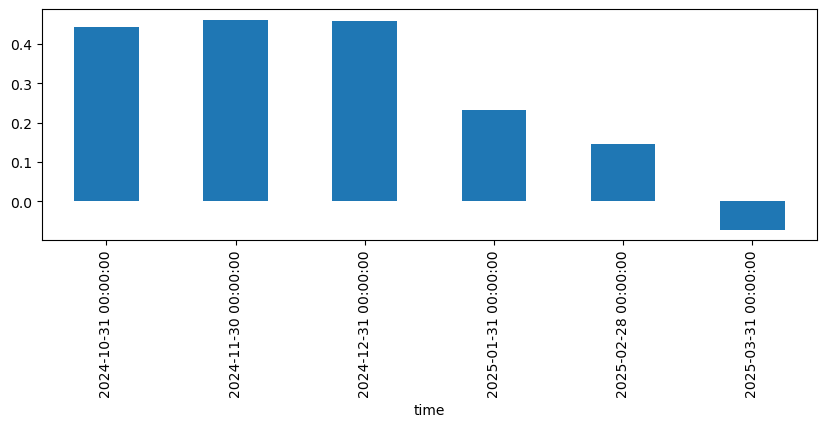

In [406]:
mask_data = df['y_pred'].notnull()
plt.figure(figsize=(10, 3))
(df.loc[mask_data, ['time', 'target', 'income_rate', 'y_pred']].groupby(pd.Grouper(key='time', freq='ME')).apply(lambda x:
                                                                            roc_auc_score(x['target'], x['y_pred'])
                                                                                                          ) - 0.5).plot.bar()

#### 2. WIN

In [410]:
np.quantile(df.loc[mask_valid, 'y_pred'], q=q)

0.13445166352208648

/var/folders/rm/zt5_90s5727289mv2gzbkw980000gn/T/ipykernel_74448/2056057339.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.loc[mask_data&mask_last_bin, ['time', 'target', 'income_rate', 'y_pred']].groupby(pd.Grouper(key='time', freq='ME')).apply(lambda x:


<Axes: xlabel='time'>

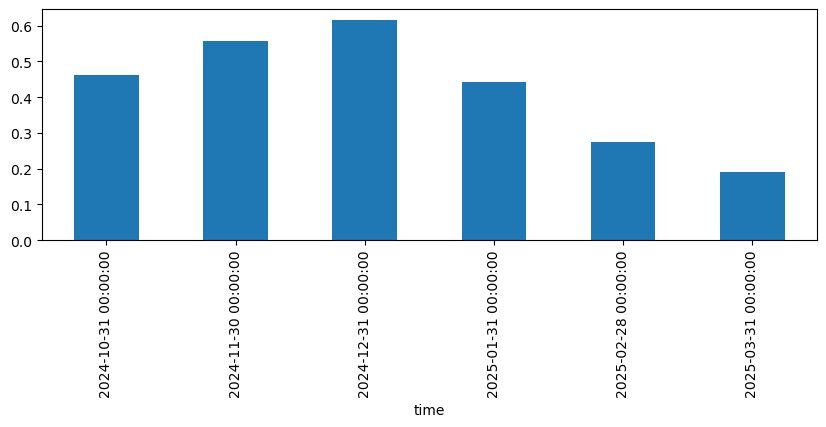

In [412]:
q = 0.9
col_target = 'target'

mask_last_bin = df['y_pred'] >= np.quantile(df.loc[mask_valid, 'y_pred'], q=q)

mask_data = df['y_pred'].notnull()
plt.figure(figsize=(10, 3))
df.loc[mask_data&mask_last_bin, ['time', 'target', 'income_rate', 'y_pred']].groupby(pd.Grouper(key='time', freq='ME')).apply(lambda x:
                                                                            x[col_target].mean()).plot.bar()

#### 3. income_rate

/var/folders/rm/zt5_90s5727289mv2gzbkw980000gn/T/ipykernel_74448/1220509864.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  (df.loc[mask_data&mask_last_bin, ['time', 'target', 'income_rate', 'y_pred']].groupby(pd.Grouper(key='time', freq='ME')).apply(lambda x:


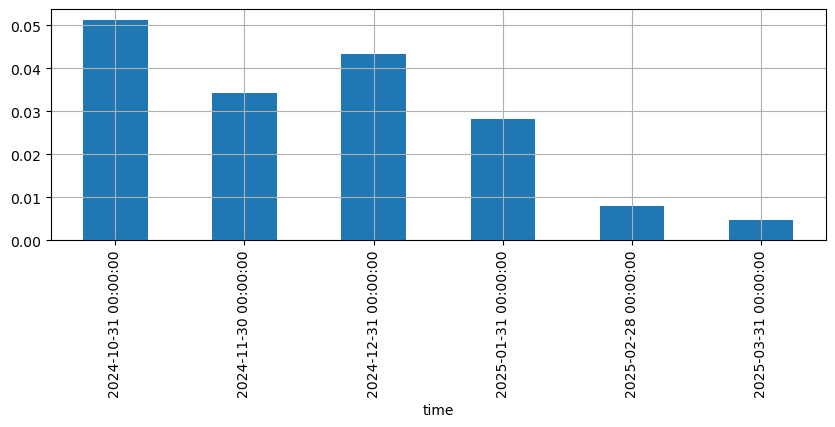

In [414]:
q = 0.9
col_target = 'income_rate'

mask_last_bin = df['y_pred'] >= np.quantile(df.loc[mask_valid, 'y_pred'], q=q)

mask_data = df['y_pred'].notnull()
plt.figure(figsize=(10, 3))
(df.loc[mask_data&mask_last_bin, ['time', 'target', 'income_rate', 'y_pred']].groupby(pd.Grouper(key='time', freq='ME')).apply(lambda x:
                                                                            x[col_target].mean()) -1).plot.bar()
plt.grid()

#### 4. Отложенная выборка

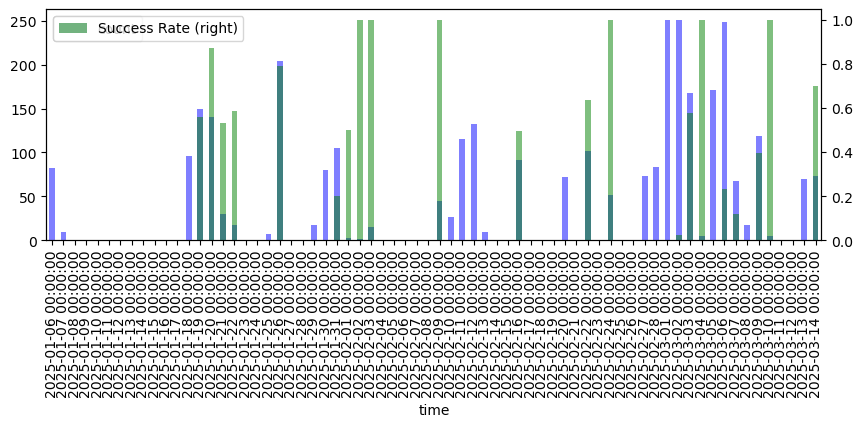

INCOME_RATE


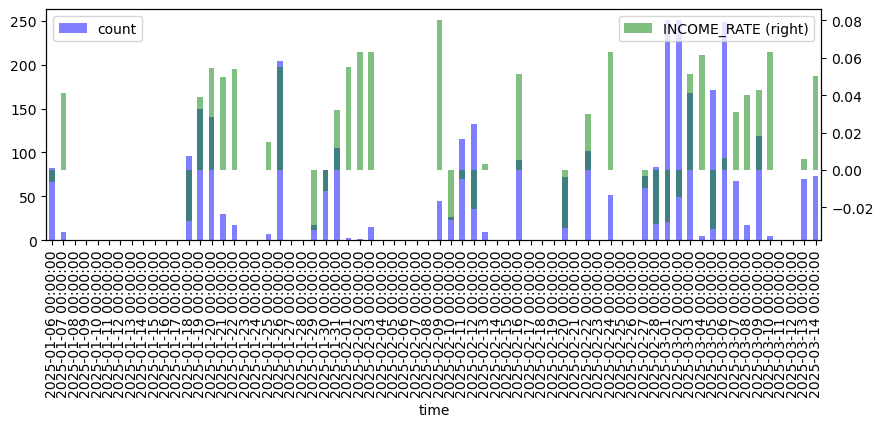

In [418]:
#distibution in time
#win
col_pred = 'y_pred'
q = 0.9
freq='D'

mask_data = mask_valid|mask_test|mask_test2#|mask_test3

threshold = np.quantile(df.loc[mask_valid, col_pred], q=q)
mask_last_bin = df[col_pred] >= threshold


plt.figure(figsize=(10, 3))
df.loc[mask_data&mask_last_bin, ['time', 'target']].groupby(pd.Grouper(key='time', freq=freq)).target.count().plot.bar(sharex=True, color='blue', alpha=0.5, label='count')
#plt.show()
plt.legend()
df.loc[mask_data&mask_last_bin, ['time', 'target']].groupby(pd.Grouper(key='time', freq=freq)).target.mean().plot.bar(sharex=True, color='green', secondary_y=True, alpha=0.5, label='Success Rate')
plt.legend()
plt.show()


#distibution in time
#income_rate
print('INCOME_RATE')

plt.figure(figsize=(10, 3))
df.loc[mask_data&mask_last_bin, ['time', 'income_rate']].groupby(pd.Grouper(key='time', freq=freq)).income_rate.count().plot.bar(sharex=True, color='blue', alpha=0.5, label='count')
#plt.show()
plt.legend()
(df.loc[mask_data&mask_last_bin, ['time', 'income_rate']].groupby(pd.Grouper(key='time', freq=freq)).income_rate.mean() - 1).plot.bar(sharex=True, color='green', secondary_y=True, alpha=0.5, label='INCOME_RATE')
plt.legend()
plt.show()

In [1127]:
#y_test3

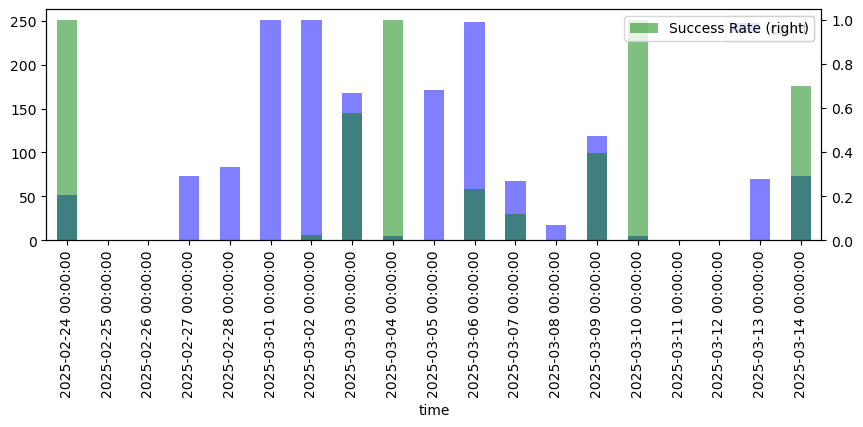

INCOME_RATE


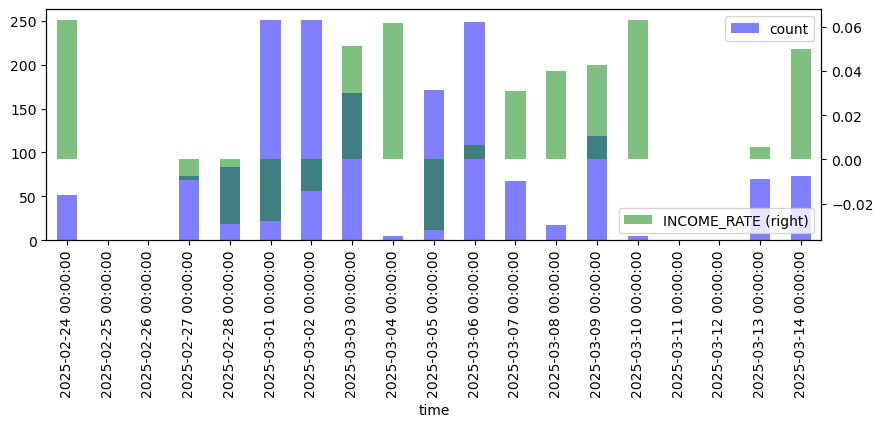

In [433]:
#distibution in time
#win
col_pred = 'y_pred'
q = 0.9
freq='D'


mask_data = mask_test2


threshold = np.quantile(df.loc[mask_valid, col_pred], q=q)
mask_last_bin = df[col_pred] >= threshold


plt.figure(figsize=(10, 3))
df.loc[mask_data&mask_last_bin, ['time', 'target']].groupby(pd.Grouper(key='time', freq=freq)).target.count().plot.bar(sharex=True, color='blue', alpha=0.5, label='count')
#plt.show()
plt.legend()
df.loc[mask_data&mask_last_bin, ['time', 'target']].groupby(pd.Grouper(key='time', freq=freq)).target.mean().plot.bar(sharex=True, color='green', secondary_y=True, alpha=0.5, label='Success Rate')
plt.legend()
plt.show()


#distibution in time
#income_rate
print('INCOME_RATE')

plt.figure(figsize=(10, 3))
df.loc[mask_data&mask_last_bin, ['time', 'income_rate']].groupby(pd.Grouper(key='time', freq=freq)).income_rate.count().plot.bar(sharex=True, color='blue', alpha=0.5, label='count')
#plt.show()
plt.legend()
(df.loc[mask_data&mask_last_bin, ['time', 'income_rate']].groupby(pd.Grouper(key='time', freq=freq)).income_rate.mean() - 1).plot.bar(sharex=True, color='green', secondary_y=True, alpha=0.5, label='INCOME_RATE')
plt.legend()
plt.show()

In [425]:
#mean_income_rate_by_day
(df.loc[mask_valid&mask_last_bin, ['time', 'income_rate']].groupby(pd.Grouper(key='time', freq=freq)).income_rate.mean() - 1).mean(), (df.loc[mask_test&mask_last_bin, ['time', 'income_rate']].groupby(pd.Grouper(key='time', freq=freq)).income_rate.mean() - 1).mean(), (df.loc[mask_test2&mask_last_bin, ['time', 'income_rate']].groupby(pd.Grouper(key='time', freq=freq)).income_rate.mean() - 1).mean()


(0.02200709729474894, 0.023863343211569032, 0.02024511593516703)

In [427]:
df.loc[mask_valid&mask_last_bin, 'time'].dt.date.nunique(), df.loc[mask_test&mask_last_bin, 'time'].dt.date.nunique(),  df.loc[mask_test2&mask_last_bin, 'time'].dt.date.nunique()


(12, 11, 15)

In [429]:
threshold = np.quantile(df.loc[mask_valid, 'y_pred'], q=0.9)

In [1138]:
#sum_income_rate
mean_income_rate_month(D_valid, y_pred_valid, threshold=threshold), mean_income_rate_month(D_test, y_pred_test, threshold=threshold), mean_income_rate_month(D_test2, y_pred_test2, threshold=threshold)

(0.06049424306550394, 0.049778267425649315, 0.05359498661153247)

In [1141]:
#test3
(df.loc[mask_test3&mask_last_bin, ['time', 'income_rate']].groupby(pd.Grouper(key='time', freq=freq)).income_rate.mean() - 1).mean()

0.0030187571083587226

In [1143]:
df.loc[mask_test3&mask_last_bin, 'time'].dt.date.nunique()

33

In [1145]:
mean_income_rate_month(D_test3, y_pred_test3, threshold=threshold)

0.055606090705674446

In [1149]:
mask_data = mask_valid | mask_test | mask_test2

In [435]:
n = 0
pd.set_option('display.max_rows', 200)
(df.loc[mask_data&mask_last_bin, ['time', 'income_rate', 'ticker']].groupby(pd.Grouper(key='time', freq='D')).apply(
    lambda x: x['income_rate'].values[n] if x.shape[0] > n else None) - 1).mean()


/var/folders/rm/zt5_90s5727289mv2gzbkw980000gn/T/ipykernel_74448/1640586492.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  (df.loc[mask_data&mask_last_bin, ['time', 'income_rate', 'ticker']].groupby(pd.Grouper(key='time', freq='D')).apply(


0.013450404335823504

In [438]:
n = 0
pd.set_option('display.max_rows', 200)
(df.loc[mask_valid&mask_last_bin, ['time', 'income_rate', 'ticker']].groupby(pd.Grouper(key='time', freq='D')).apply(
    lambda x: x['income_rate'].values[n] if x.shape[0] > n else None) - 1).mean()

/var/folders/rm/zt5_90s5727289mv2gzbkw980000gn/T/ipykernel_74448/1656526771.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  (df.loc[mask_valid&mask_last_bin, ['time', 'income_rate', 'ticker']].groupby(pd.Grouper(key='time', freq='D')).apply(


0.0008238830775141315

In [440]:
n = 0
pd.set_option('display.max_rows', 200)
(df.loc[mask_test&mask_last_bin, ['time', 'income_rate', 'ticker']].groupby(pd.Grouper(key='time', freq='D')).apply(
    lambda x: x['income_rate'].values[n] if x.shape[0] > n else None) - 1).mean()

/var/folders/rm/zt5_90s5727289mv2gzbkw980000gn/T/ipykernel_74448/192763211.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  (df.loc[mask_test&mask_last_bin, ['time', 'income_rate', 'ticker']].groupby(pd.Grouper(key='time', freq='D')).apply(


0.011175368162590753

In [442]:
n = 0
pd.set_option('display.max_rows', 200)
(df.loc[mask_test2&mask_last_bin, ['time', 'income_rate', 'ticker']].groupby(pd.Grouper(key='time', freq='D')).apply(
    lambda x: x['income_rate'].values[n] if x.shape[0] > n else None) - 1).mean()

/var/folders/rm/zt5_90s5727289mv2gzbkw980000gn/T/ipykernel_74448/1559495362.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  (df.loc[mask_test2&mask_last_bin, ['time', 'income_rate', 'ticker']].groupby(pd.Grouper(key='time', freq='D')).apply(


0.013450404335823504

In [1160]:
n = 0
pd.set_option('display.max_rows', 200)
(df.loc[mask_test3&mask_last_bin, ['time', 'income_rate', 'ticker']].groupby(pd.Grouper(key='time', freq='D')).apply(
    lambda x: x['income_rate'].values[n] if x.shape[0] > n else None) - 1).mean()

/var/folders/rm/zt5_90s5727289mv2gzbkw980000gn/T/ipykernel_93253/2683039865.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  (df.loc[mask_test3&mask_last_bin, ['time', 'income_rate', 'ticker']].groupby(pd.Grouper(key='time', freq='D')).apply(


0.0012062589327494304

#### Points in life

In [1164]:
threshold

0.22686240875366323

In [ ]:
mask_dev = df['time'] > pd.Timestamp('2025-01-20')
df.loc[mask_dev, 'y_pred'] = model.predict(df.loc[mask_dev, features_fe]) #feratures_fe

#threshold = 0.5695387939626755
df.loc[mask_dev, ['time', 'y_pred']].groupby(pd.Grouper(key='time', freq='D')).apply(
    lambda x: (x['y_pred'] >= threshold).sum())

### Обучить на всем

In [1337]:
features

['close_w30_lvl_1.015-1.02',
 'close_w30_lvl_1.02-1.03',
 'close_w120_lvl_1.02-1.03',
 'close/close_w5_expma',
 'close/close_w10_expma',
 'close/close_w20_expma',
 'close/close_w30_expma',
 'close/close_w60_expma',
 'close/close_w120_expma',
 'close_w5_expma/close_w20_expma',
 'close_w5_expma/close_w30_expma',
 'close_w5_expma/close_w60_expma',
 'close_w5_expma/close_w120_expma',
 'close_w10_expma/close_w30_expma',
 'close_w10_expma/close_w60_expma',
 'close_w10_expma/close_w120_expma',
 'close_w20_expma/close_w60_expma',
 'close_w20_expma/close_w120_expma',
 'close_w30_expma/close_w60_expma',
 'close_w30_expma/close_w120_expma']

In [1339]:
features_fe = features
cat_features = []
target = 'target'

In [1341]:
mask_data = mask_train | mask_valid | mask_test | mask_test2
#mask_data = (pd.Timestamp('2024-01-01') <= df['time']) &  (df['time'] < pd.Timestamp('2025-01-01'))
#print(mask_data.sum())
#mask_data = mask_valid | mask_test | mask_test2
#mask_data = mask_test2

D_data = lgbm.Dataset(df.loc[mask_data, features_fe], label=df.loc[mask_data, target], feature_name=features_fe, categorical_feature=cat_features, free_raw_data=False)


D_data.income_rate = df.loc[mask_data, 'income_rate'].values

D_data.time = df.loc[mask_data, 'time'].values

In [1343]:
D_test3 = lgbm.Dataset(df.loc[mask_test3, features_fe], label=df.loc[mask_test3, target], feature_name=features_fe, categorical_feature=cat_features, free_raw_data=False)
D_test3.income_rate = df.loc[mask_test3, 'income_rate'].values
D_test3.time = df.loc[mask_test3, 'time'].values

In [1367]:
params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    
    
    "num_boost_round" : 100,

    
    "num_leaves": 31,
    #"learning_rate": 0.001,
     "feature_fraction": 0.5,
     "bagging_fraction": 0.5,
     "bagging_freq": 1,
     'lambda_l1' : 1,
     'lambda_l2' : 1,
    #"verbose": 0,

    #'max_bin' : 100000,
    
    
    # "metric": "auc",
      "metric" : 'mean_income_rate',
     "early_stopping" : 10,



    
}

In [1369]:
#model.num_trees()

In [1371]:
#del params['metric'], params['early_stopping']

In [1373]:
#params['num_boost_round'] = 40

In [1375]:
model = lgbm.train(params, train_set=D_data, valid_sets=[D_test3], feval=mean_income_rate)

/opt/anaconda3/lib/python3.12/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[13]	valid_0's mean_income_rate: 0.00141


In [1377]:
model.num_trees()

13

In [1352]:
#dump_pkl(model, 'model_-0.5_+1.5_4hour.pkl')

In [1354]:
#model = load_pkl('model_-0.5_+1.5_4hour.pkl')
#model.num_trees()

In [1379]:
y_pred_data= model.predict(D_data.data)


df["y_pred"] = None
df.loc[mask_data, 'y_pred'] = y_pred_data

roc_auc_score(D_data.label, y_pred_data)

0.6770638965364955

In [1382]:
y_pred_test3 = model.predict(D_test3.data)
df.loc[mask_test3, 'y_pred'] = y_pred_test3
roc_auc_score(D_test3.label, y_pred_test3)

0.6090700984894337

In [1386]:
THREHOLD = np.quantile(y_pred_test3, q=0.995)
#THRESHOLD = threshold
THRESHOLD

0.22686240875366323

In [1388]:
mean_income_rate_point(D_data, y_pred_data, threshold=THRESHOLD)

0.0026379170347794467

In [1391]:
mean_income_rate_day(D_data, y_pred_data, threshold=THRESHOLD)

0.0036637617789679307

In [1394]:
mean_income_rate_month(D_data, y_pred_data, threshold=THRESHOLD)

0.05208178282717489

In [1398]:
mean_income_rate_point(D_test3, y_pred_test3, threshold=THRESHOLD)

0.0026117390072024627

In [1400]:
mean_income_rate_tick(D_test3, y_pred_test3, threshold=THRESHOLD)

0.0026933455751055775

In [1402]:
mean_income_rate_day(D_test3, y_pred_test3, threshold=THRESHOLD)

0.004326890513360705

In [1404]:
mean_income_rate_month(D_test3, y_pred_test3, threshold=THRESHOLD)

0.05260587939928016

In [ ]:
# Стало лучше, но тут я обучался под valid

In [1221]:
# +-

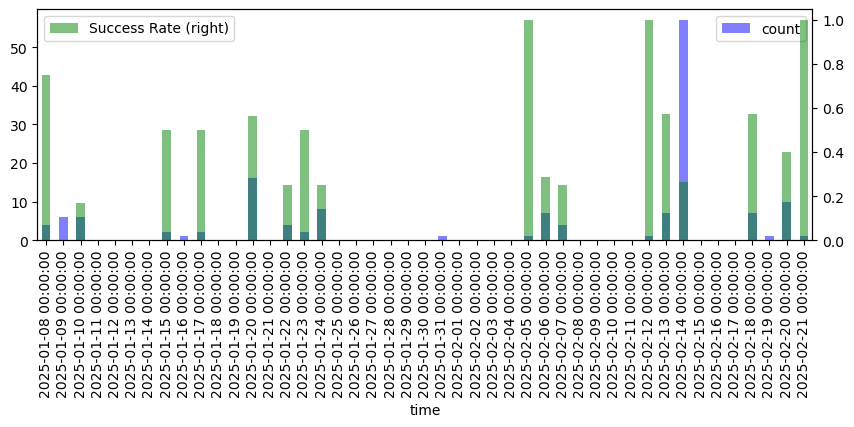

INCOME_RATE


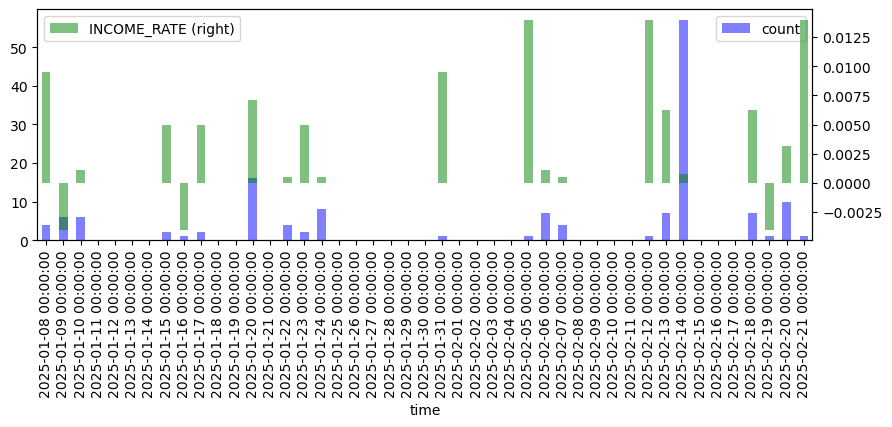

In [1406]:
#distibution in time
#win
col_pred = 'y_pred'
freq='D'


mask_data = mask_test3


#threshold = np.quantile(df.loc[mask_valid, col_pred], q=q)
mask_last_bin = df[col_pred] > THRESHOLD


plt.figure(figsize=(10, 3))
df.loc[mask_data&mask_last_bin, ['time', 'target']].groupby(pd.Grouper(key='time', freq=freq)).target.count().plot.bar(sharex=True, color='blue', alpha=0.5, label='count')
#plt.show()
plt.legend()
df.loc[mask_data&mask_last_bin, ['time', 'target']].groupby(pd.Grouper(key='time', freq=freq)).target.mean().plot.bar(sharex=True, color='green', secondary_y=True, alpha=0.5, label='Success Rate')
plt.legend()
plt.show()


#distibution in time
#income_rate
print('INCOME_RATE')

plt.figure(figsize=(10, 3))
df.loc[mask_data&mask_last_bin, ['time', 'income_rate']].groupby(pd.Grouper(key='time', freq=freq)).income_rate.count().plot.bar(sharex=True, color='blue', alpha=0.5, label='count')
#plt.show()
plt.legend()
(df.loc[mask_data&mask_last_bin, ['time', 'income_rate']].groupby(pd.Grouper(key='time', freq=freq)).income_rate.mean() - 1).plot.bar(sharex=True, color='green', secondary_y=True, alpha=0.5, label='INCOME_RATE')
plt.legend()
plt.show()

In [1411]:
s = model.feature_importance(importance_type='gain').sum()
sorted(zip(features_fe, np.round((model.feature_importance(importance_type='gain')/s*100), 2)), key=lambda x: -x[1])

[('close_w20_expma/close_w120_expma', 18.4),
 ('close_w120_lvl_1.02-1.03', 16.46),
 ('close_w30_expma/close_w120_expma', 13.64),
 ('close/close_w5_expma', 8.8),
 ('close_w10_expma/close_w120_expma', 7.4),
 ('close/close_w10_expma', 5.55),
 ('close_w30_expma/close_w60_expma', 4.48),
 ('close_w5_expma/close_w120_expma', 3.96),
 ('close_w10_expma/close_w30_expma', 3.36),
 ('close/close_w30_expma', 2.44),
 ('close_w20_expma/close_w60_expma', 2.33),
 ('close/close_w120_expma', 2.16),
 ('close_w5_expma/close_w30_expma', 2.16),
 ('close_w10_expma/close_w60_expma', 2.1),
 ('close_w5_expma/close_w20_expma', 1.76),
 ('close_w5_expma/close_w60_expma', 1.74),
 ('close/close_w60_expma', 1.48),
 ('close_w30_lvl_1.015-1.02', 0.83),
 ('close/close_w20_expma', 0.8),
 ('close_w30_lvl_1.02-1.03', 0.12)]